<a href="https://colab.research.google.com/github/GiovaneCarvalho/Testing-Parameters-for-a-built-CNN-in-Pytorch/blob/main/CNN_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group information

Names:

Giovane Oliveira de Carvalho RA:173146

Francisco Eduardo Pereira Sousa Silva RA: 174292

Pedro Benetton RA: 185566

## Objective:

To explore **deep learning** techniques, focused on **Convolutional Neural Networks**. In this task you'll be architecturing different CNNs to solve an image classification problem.

This **MUST** be developed using the pytorch and Sklearn libraries (PyTorch Lightning is **not** allowed).

*Tip: Use the Pillow (PIL) library to work with images with pytorch. Also, you can use [tqdm](https://github.com/tqdm/tqdm) library to see the progress of the training process.*

## Dataset

The dataset you should use is an adaptation of the "CIFAR10" dataset. The CIFAR10 dataset is a dataset of 32x32 images of 10 different classes, and is extensivelly used for classification of images using CNN.

In this work, You will only use CIFAR10 data of 3 classes: airplane, bird and cat. You also will only use a limited amount of the data of each class (the original dataset has 6000 images per class). For each class, the amount of images is 400 for training, 200 for validation and 300 for test. This is defined so that the training steps are faster, but it makes the problem harder, as we are working with few data points.


The dataset will be available in the [same folder](https://drive.google.com/drive/folders/14uiy_7xMq5LOqODBzbIJLD4Vq0E9XD5v) as the other tasks, in the "cifar_mod" folder. You can copy the dataset folder or download it locally.

Here are some examples of each class from the dataset:

**airplane**

 ![airplane](https://drive.google.com/uc?export=view&id=1XeJJ2BATM2vKiVCtNYrBj5bWVlmPU_Xh) ![airplane](https://drive.google.com/uc?export=view&id=1e43aEgC2qi6a6md8ZxNPXbj-1WjcwgMP) ![airplane](https://drive.google.com/uc?export=view&id=1WTPx55zpBmQkbbof_oOPvVx8O-BIezUM)

**bird**

![bird](https://drive.google.com/uc?export=view&id=1sP3aKEdEgNwuymHowkKZyhlJBeZ9l0GN) ![bird](https://drive.google.com/uc?export=view&id=1fbdniH7E6ElN723DBCW5PMzosPLW-bUp) ![bird](https://drive.google.com/uc?export=view&id=1rA3zESk4aAWsHQPW3YJlpaTg8S9g_yEC)

**cat**

![cat](https://drive.google.com/uc?export=view&id=1EcRNpo7sMU0owopcdvW3hmWUwzgHft7X) ![cat](https://drive.google.com/uc?export=view&id=1DGIKN3bX2Opb-hI714exboxjdvDfpKgc) ![cat](https://drive.google.com/uc?export=view&id=1t3kt07q3S-CI9x521y4UgP7I91QjviNl)


As in every machine learning task, we need to understand and analyze the data. From the way that the dataset was collected (data collection protocol, equipment used, people involved), to its final result (resulting files) and objective. When dealing with images, we usually want to track possible biases that different classes may have when collected. This dataset contains images of the target objects in a centered position in the foreground, having few biases related to the common background of some classes (for example: airplanes in the blue sky).

As in the other tasks we already covered the data analysis part, we will focus on the technical machine learning parts for this one. Just remember that images are another type of data and we also could (and **should**) analyze the information before applying machine learning techniques blindly.

## Load the dataset (2 Points)

When working with Pytorch, we need to create a "Dataset" class that usually will handle the data loading, as well as the data transformations, and will allow us to retrieve the data with the respective label.

Data transformations are an important part of Pytorch datasets, as we already studied in the lectures that data augmentation can be powerful in training deep neural networks. But some of those transformations are just to define the entry of the model as Pytorch tensors or normalizing data, which can be impactful as well.

Create a Pytorch Dataset and Dataloader with and without data augmentation for training data (to compare later). The `Dataset` class has 3 required methods: `__init__`, `__len__`, and `__getitem__`. In the code below we have some basic idea of an ImageDataset.

You can choose how to implement the image loading in the class:
- Inside the `__getitem__` method (low memory usage for each dataset instance, slower for training)
- Inside the `__init__` method (saves all images on memory, but training is faster)

Either implementation is ok, if the machine you're using supports the loading of all images this is probably better for performance.

For a deeper look at Pytorch datasets and dataloaders, look [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

The images are already divided by folder for train, validation and test, and you should follow this order. The targets of each image are described in the filename in the following pattern: `[image_number]_[class].jpg`.

To create the data augmentation you can follow the `preparation` example below, and add different Pytorch transformations. A list of available transformations (as well as examples) can be found in the [official documentation (here)](https://pytorch.org/vision/stable/transforms.html#v2-api-reference-recommended).

Importando as bibliotecas que serão usadas durante o processo de treinamento da CNNs, vamos utilizar o pytorch como base.

Também vamos importar algumas funções do sklearn para cálculo de métricas.

In [ ]:
import torch
from torch import nn as nn
import torchvision.transforms.v2 as transforms
from torchvision.io import read_image
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import os


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
from torch.utils.data import DataLoader
import torch.optim as optim

Criando a conexão com o Google Colab.

In [ ]:
# link with google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/cifar_mod" # Change this to be the correct path if you added the dataset in a different location

Mounted at /content/gdrive


Aqui passamos as especificações de entrada.

Estamos com uma imagem 32x32 e RGB, passamos a largura e altura, assim como o número de canais.

Criamos também a classe de processamento dos dados. No método construtor listamos a quantidade de arquivos em cada pasta, assim como levantamos o label de cada imagem.

Já no método __getitem__ fazemos a leitura da imagem e transformamos em um tensor para ser usado mais a frente. Vamos utilizar a classe ImageDataset e um DataLoader para carregar os dados de maneira adequada para passar para nossa CNN.

Outro ponto é com relação a transformações. Criou-se uma instância de transformação para data augmatation que será utilizada nas etapas posteriores do treinamento.

In [ ]:
# Set the expected input shape
input_width =  32 # define your CNN input width and height
input_height = 32
nchannels = 3

# train transformations - here we can have data augmentation, as well as the transformations needed for preparing the data for the model
augmentation = transforms.Compose([
    transforms.RandomResizedCrop(size=(32, 32), antialias=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToDtype(torch.float32, scale=True),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ,])


# test transformations - here we should only have the transformations needed for preparing the data for the model
# This is just an example, but you can you can use it.
preparation = transforms.Compose([
              # make all images the same size with a specific interpolation method
              transforms.Resize((input_width,input_height), interpolation=transforms.InterpolationMode.BILINEAR,
                                max_size=None, antialias=True),
              # transform the image to Tensor (this will change the configuration from Height x Width x Channels to Channels x Height x Width)
              transforms.ToDtype(torch.float32, scale=True),
              # this normalization is just an example, based on the ImageNet mean and standard deviation of images. You can test without it if you want!
              transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
          ])

class ImageDataset():
  def __init__(self, dir, transform=None):
    self.dir = path +  '/' + dir
    self.filenames = os.listdir(self.dir)
    self.labels = [float(label.split('_')[1].split('.')[0]) for label in self.filenames]
    self.transform = transform
    # TODO: Complete __init__ method

  def __len__(self):
    return len(self.filenames) # Attention: change this line if your __init__ method uses another attribute to keep the images/filenames

  def __getitem__(self, idx):
    img_path = os.path.join(self.dir, self.filenames[idx])
    image = read_image(img_path)
    label = self.labels[idx]
    if self.transform:
        image = self.transform(image)
    # if self.target_transform:
    #     label = self.target_transform(label)
    return image/255.0, label/1.0


    '''
    Return a tuple with the image (as a Tensor) and the respective target at position idx.
    '''
    # TODO: Complete __getitem__ method

Aqui fazemos a visualização de um exemplo da imagem carregada.

Podemos fazer um processo de data augmentation, modificando a imagem original.

Number of images: 1200
Images are 32x32x3
Class of the image:  0.0


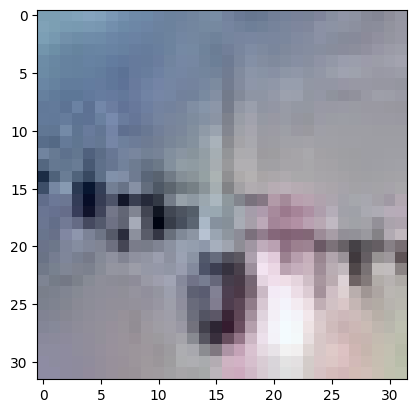

In [ ]:
# Visualize images from the training set

datatensor = ImageDataset('train', preparation)
print("Number of images:", len(datatensor))
image, target = datatensor[10] # This will execute the '__getitem__' method
nchannels = image.shape[0]
height    = image.shape[1]
width     = image.shape[2]
image     = image.permute(1,2,0).numpy() # Converts the Tensor back to image shape
image     = 255*(image - np.min(image))/(np.max(image)-np.min(image))
image     = image.astype('uint8')
print("Images are {}x{}x{}".format(width,height,nchannels))
plt.imshow(image)
print("Class of the image: ", target)
plt.show()

## Train a baseline model (1 Point)

Before going for the deep learning approach, you should test a baseline model in this problem. To do so, train a RandomForectClassifier, where the inputs are the flattened images (all pixes of 3 channels concatenated).

You should use the same train/validation/test division that you'll be using in the next section. You can use the Sklearn library for this task. Remember to test and plot a confusion matrix with the results.

Aqui utilizamos a classe construída para carregar as imagens dos dados de treino e de validação.

In [ ]:
#Treino
train = ImageDataset('train')

#Validação
valid = ImageDataset('valid')

Utilizamos o método de DataLoader para fazer a carga das imagens. Como vamos começar o treinamento do baseline usando uma RandomForest, além disso vamos utilizar como tamanho de batch o próprio tamanho do dataset.

In [ ]:
#Treino
train_dataloader = DataLoader(train, batch_size=1200, shuffle=True)

#Validação
valid_dataloader = DataLoader(valid, batch_size=600, shuffle=True)

Carregando as features e labels.

In [ ]:
#Treino
train_features, train_labels = next(iter(train_dataloader))

#Validação
valid_features, valid_labels = next(iter(valid_dataloader))

Aqui fazemos a transformação e conectenação dos dados para um vetor de caracteristicas. Como cada imagem é de 32x32 com 3 canais, ficaremos com um vetor de 32x32x3= 3072 por imagem.

In [ ]:
X_train = []
X_valid = []


for i in train_features:
  X_train.append((i.reshape(-1).numpy()))

for i in valid_features:
  X_valid.append((i.reshape(-1).numpy()))


Criando o vetor de Labels.

In [ ]:
#Treino
y_train = np.array(train_labels)

#Validação
y_valid = np.array(valid_labels)

Fitando o modelo de RandomForest para as features Flatten concatenadas.

Aqui, como estamos construindo um baseline, não vamos fazer o tunnagem do modelo via hiperparâmentros. Vamos seguir com os hiperparâmetros padrões dos RandoForestClassifier().

In [ ]:
RF = RandomForestClassifier()

RF.fit(X_train, y_train)

RandomForestClassifier()

Realizando a predição para as bases de treino e validação.

In [ ]:
#Fazendo a predição no treino
y_pred_train = RF.predict(X_train)

#Fazendo a predição na validação
y_pred_valid = RF.predict(X_valid)

Criando uma função para plotar a matriz de confusão.

In [ ]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Real')
    plt.show()

Plotando o Resultado para a base de treino.

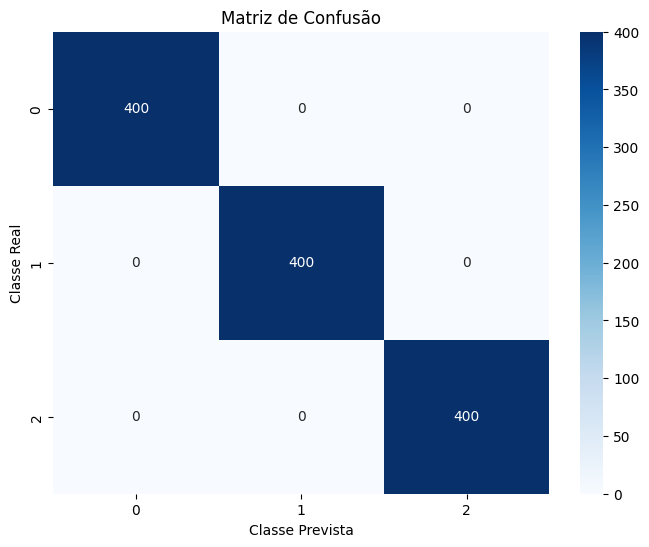

In [ ]:
#Previsão do Treino
conf = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(conf)

Como era de se esperar, visto que temos mais de 3000 features e apenas 1200 observações para treino, o modelo parece ter dado um overfitting. O modelo acertou 100% das situações de predição. Vamos ver a matriz de confusão para a base de validação para confirmar nossas hipótese.

Avaliando a base de validação.

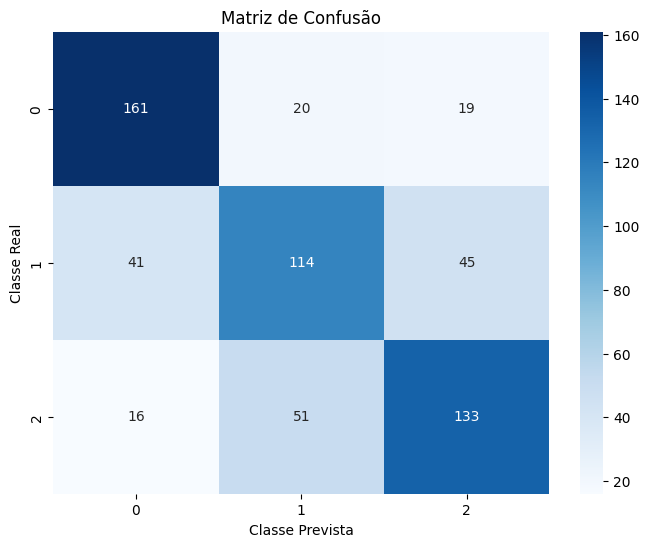

In [ ]:
#Previsão da Validação

conf = confusion_matrix(y_valid, y_pred_valid)
plot_confusion_matrix(conf)

Aqui realmente fica claro a situação de overfitting. Apesar disso, os resultados não parecem ter sido tão ruins na base de validação.

O modelo ainda conseguiu acertar a maioria das observações nas classes corretas. Podemos ter um overview do resultado via acuracidade, vamos plota-la abaixo.

In [ ]:
accuracy_score(y_valid, y_pred_valid)

0.68

O resultado da acuracidade para a base de validação pode ser vista acima. Nosso objetivo com a CNN é bater este resultado.

## Build a CNN (6 Points)

In this section, you should construct and validate a CNN architecture for the given problem.

It's required that you test at least the following parts of a CNN:
- Number of convolutional layers and different output sizes
- Kernel size of filters
- Number of training epochs
- Learning rate of the network
- Batchsize used in dataloader
- Stride on convolutional or pooling layers
- Different architecture for the final dense layer (with or without hidden layers and their size)

Also, you must compare at least for one network if the data augmentation is helping the training process or not.

Lastly, you must change the `Criterion` function to return the balanced accuracy instead of the normal one.

--------

The process to build a CNN is an exploratory analysis and should be done carefully. As this is a costly process, you will not test all possibilities between each other, you should interpret the results at each step and understand what is happening or not happening.

As this is a costly process, you should use the normal division of train/validation/test, instead of cross validation. Also, at each network built and trained/validated, you should look at the results to understand if any overfitting or underfitting is happening. Save the values of each batch of train and validation to analyze how the model performed over the epochs.

### Exploding/vanishing gradients

As we already learned, the weights of a neural network are updated using the backpropagation algorithm. As our network grows in depth, there are two problems that can occur with the backpropagation algorithm, known as Exploding and Vanishing gradients.

As both names imply, both conditions relate to a gradient calculation that goes out of control for some reason.

The exploding gradient can happen when the current weights generate a very large loss, and all the network weights are updated by a huge amount. This can lead to a cycle where the network is not able to learn because every learning step impacts too much the network, making it very unstable.

On the other side, the vanishing gradient will happen when the gradients get too small, and the updates are not able to propagate to the initial layers.

There are a couple of ways to solve those issues. The first is to use an activation function that is "non-saturating". The sigmoid function is an example of a saturating function because its derivative tends to 0 on larger positive or negative values. The best activation functions to avoid this issue are the ReLU and its variations (LReLU, PReLU, ELU, etc). All those examples help to mitigate the vanishing gradient.

Another important step is to initialize the weights of the network properly. Initializing the weights randomly can also lead to vanishing/exploding gradients in some situations. The common strategy is to use a heuristic. We are not going to cover this manner in a deeper aspect, but the Xavier initialization is already implemented in the example below.

Finally, the best thing to avoid vanishing and exploding gradients in a deep CNN is to use the Batch Normalization technique. This technique is a new operation on the CNN, that normalizes its input and adds a parameter for scale and another for shifting. This enables the network to learn the optimal scale and mean of the layer. This normalization uses the data of the batch of images being executed on the model to find the mean and standard deviation. In pytorch, there is a function to use this technique in the `nn` module: `nn.BatchNorm2d()`. The BatchNorm operation can be used before or after the activation function.

For example:
- Conv -> BatchNorm -> Activation(ReLU) -> Pooling
Or
- Conv -> Activation(ReLU) -> BatchNorm -> Pooling).

In this task, you may face problems concerning the stability and convergence of the network because of the exploding or vanishing gradients, and it is recommended that you use the techniques cited to avoid this issue.

In [ ]:
gpu = torch.cuda.is_available()

if not gpu:
  print("GPU not available!")

device = torch.device(0) if gpu else torch.device('cpu')

GPU not available!


**Saving models**

As the CNN training process can take some time, is interesting to save your models, to avoid re-training in the case of a crash or just to save your work for other time.

The next cell shows a simple code to save and load pytorch models. Remember to keep the class of the model in the same way, as the state_dict will not work if you change the architecture. Create new classes for different tests, with names that correctly describe what is being tested.

**Note**: If you're using google colab, just saving the model is not enough. You need to save it for a folder in your google Drive, or download the files after saving them.

**Example of train/validate code**

In the next cells, we show an example of how to develop the train/validation functions using pytorch. You don't need to use this code, but it is a place to start.

In [ ]:
def train_batch(model, data, optimizer, criterion, device):
  '''
  Funtion that trains a batch of data in the 'device' (that should be a GPU)
  'data' is a batch of the dataloader.
  'optmizer' should be an instance of an pytorch optmizer. You don't need to test different optmizers, just go with SGD (torch.optim.SGD).
  'criterion' is a custom function to calculate the loss and accuracy of the predictions of the batch.
  'device' is the device that the model is loaded on.
  '''
  model.train()
  ims, targets = data
  targets = targets.type(torch.LongTensor)
  ims = ims.to(device=device)
  targets = targets.to(device=device)
  preds = model(ims)
  loss, acc = criterion(model, preds, targets, device)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  # print('Loss no treinamento: ', loss.item(), acc.item())
  return loss.item(), acc.item()

# This line avoid that the model weights change during validation
@torch.no_grad()
def validate_batch(model, data, criterion, device):
  '''
  Funtion that validates a batch of data in the 'device' (that should be a GPU).
  Same parameters as 'train_batch', but this time no optmizer is needed.
  '''
  model.eval()
  ims, targets = data
  targets = targets.type(torch.LongTensor)
  ims = ims.to(device=device)
  targets = targets.to(device=device)
  preds = model(ims)
  loss, acc = criterion(model, preds, targets, device)

  # print('Loss na Validação: ', loss.item(), acc.item())
  return loss.item(), acc.item()

def Criterion(model, preds, targets, device):
  '''
  Function that calculates the loss and accuracy of a batch predicted by the model.
  '''
  ce            = nn.CrossEntropyLoss().to(device) # You don't need to change the loss function (but you can if it makes sense on your analysis)
  loss          = ce(preds, targets.long())
  pred_labels   = torch.max(preds.data, 1)[1] # same as argmax
  acc           = torch.sum(pred_labels == targets.data)
  n             = pred_labels.size(0)
  acc           = acc/n

  return loss, acc


# **Modelo Base CNN**

Vamos começar com uma CNN bem básica, começaremos com 1 camada de convolucional, 1 camada de pooling, a camada de flatten, 1 camada densa e a saída.

A ideia é ir envoluindo a arquitetura da rede e variando parâmetros. No final, baseando-se no conceito da melhora ou não da métrica de interesse, vamos escolher o melhor modelo e fazer a avaliação na base de teste.

Também queremos ver como o modelo se compara com o baseline utilizando o RandomForest.

Aqui temos uma formula que calcula o tamanho da imagem em cada uma das saídas.

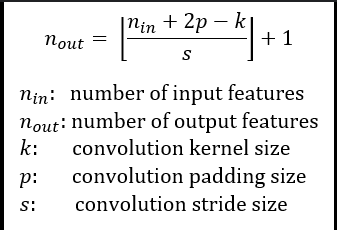

In [ ]:
class CNN_1(nn.Module):
  def __init__(self):
    super(CNN_1, self).__init__()


    '''O Primeiro parâmetro de entrada é o número de canais de entrada, como estamos tratando imagens RGB, serão 3
    O segundo parametro representa o número de canais de saída. Eles vão ser equivalentes ao nosso número de mapas de características
    O terceiro parametro representa o tamanho do kernel, vamos começar com um tamanho de 3 x 3
    Podemos ainda selecionar o tamanho do stride e Padding, mas vamos utiliza-lo com os valores padrão. O Stride padrão é de 1 e sem padding.'''


    self.conv1 = nn.Conv2d(3, 10, 3)


    '''Precisamos fazer o acompanhamento da dimensão de saída
    Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 3 - 2*0)/1 + 1 = 30'''

    '''Adicionando a primeira camada de ativação. Vamos usar a ReLU'''
    self.activation1 = nn.ReLU()

    '''Adicionando a camada de Pooling. Vamos escolher um kernel_size  de 2x2. O padrão do stride é de ser do mesmo tamanho do kernel, logo, 2'''
    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (30 - 2 - 2*0)/2 + 1 = 15'''

    '''Achatando o tensor de saída'''
    self.flat = nn.Flatten()


    '''Adicionando a camada de achatamento. Também adicioando as camadas de saída que são do tamanho 15x15 com  10 mapas de caracteristicas'''
    self.fc1 = nn.Linear(15*15*10, 120)

    '''Adicionando uma outra camada de ativação'''
    self.activation2 = nn.ReLU()

    '''Adicionando a camada de saída'''
    self.fc2 = nn.Linear(120, 3)

    '''lastly, initialize the weights'''
    self._initialize_weights()

  def forward(self, x):
    x = self.conv1(x)
    x = self.activation1(x)
    x = self.pool1(x)
    x = self.flat(x)
    x = self.fc1(x)
    x = self.activation2(x)
    x = self.fc2(x)

    return x
    '''
    Executes a forward pass in the network with the input 'x'.
    'x' can be a batch or a single image in the expected input_shape.
    '''


  def _initialize_weights(self):
    '''
    Initialize the network weights using the Xavier initialization.
    '''
    for x in self.modules():
      if isinstance(x, nn.Linear):
        torch.nn.init.xavier_uniform_(x.weight.data)
        if (x.bias is not None):
          x.bias.data.zero_()

Vamos utilizar mini-lotes de 32 observações, tanto para treino quanto validação.

In [ ]:
#Treino
train_dataloader = DataLoader(train, batch_size=32, shuffle=True)

#Validação
valid_dataloader = DataLoader(valid, batch_size=32, shuffle=True)

Se a GPU do Colab estiver disponivel vamos alocar nossos dados de treino e teste. Também vamos alocar os pesos de conexão e bias.

In [ ]:
MyCNN = CNN_1()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

Começando o treinamento.

Vamos armazenar os resultados dos mini-lotes e épocas em um dicionário.

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)



# Fazendo a média de resultados.
acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

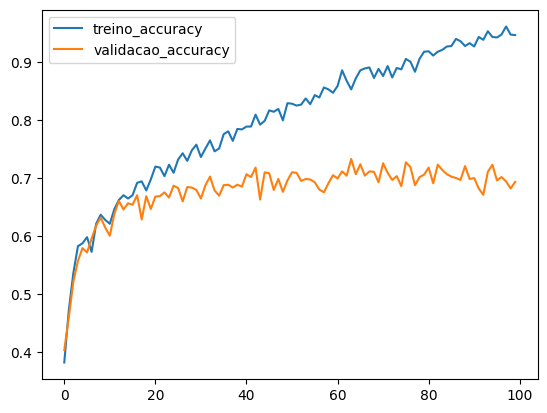

In [ ]:
pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot()

Olhando o gráfico de acuracidade podemos ver que até certo momento ambas as curvas, de treino e validação, sobem.

Porém, depois de mais ou menos 30 épocas, a métrica fica mais ou menos constante para a base de validação, oscilando ao redor de certo valor. Já a métrica da base de treino continua a subir, indicando um possívels overfitting.

Poderiamos rodar o treinamento por mais épocas, avaliando como a acurácidade na base de validação iria se comportar.

<Axes: >

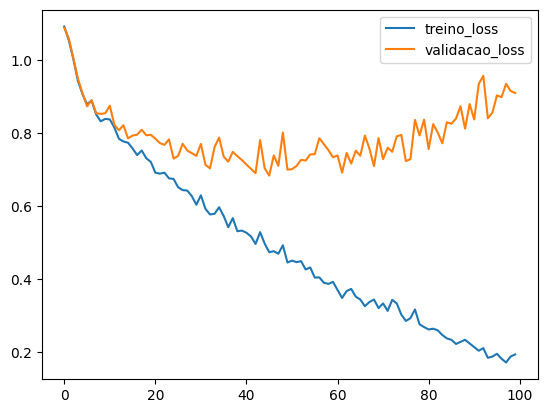

In [ ]:
pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot()

Acima podemos ver os valores de perda para a base de treino e validação. Novamente, a base de treino continua a ter valores menores a cada interação completa dos dados.

Já para a base de validação o resultado cai até certo período, mas posteriormente a isso começa a se estabilizar, com um leve aumento ao final da série.

Vamos também avaliar a métrica de acurácia média do modelo para as últimas 10 épocas da base de validação.

In [ ]:
media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

0.6952302631578947

A métrica é levemente melhor do que aquela encontrada para a Random Forest, mas aida muito próxima, de modo que não podemos afimar com 100% de certeza que o desempenho melhorou.

Por fim, vamos salvar o modelo para, caso necessário, carrega-lo novamente.

In [ ]:
torch.save(MyCNN.to('cpu').state_dict(), "CNN_1")

# **Modelo CNN variando o número de Camadas Convolucionais**

Vamos começar a variar alguns parâmetros da rede, o primeiro dele é o número de camadas convolucionais.

Vamos passar de 1 para 2 camadas convulucionais! Posteriormente vamos testar com 3 camadas.

### Modelo com 2 camadas convolucionais

In [ ]:
class CNN_2(nn.Module):
  def __init__(self):
    super(CNN_2, self).__init__()

    '''Primeira camada de convolução'''
    self.conv1 = nn.Conv2d(3, 10, 3)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 3 + 2*0)/1 + 1 = 30'''

    self.activation1 = nn.ReLU()

    '''Adicionando uma segunda camada de Convolução'''
    self.conv2 = nn.Conv2d(10, 10, 3)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (30 - 3 + 2*0)/1 + 1 = 28'''

    self.activation2 = nn.ReLU()

    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (28 - 2 - 2*0)/2 + 1 = 14'''

    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(14*14*10, 120)
    self.activation2 = nn.ReLU()
    self.fc2 = nn.Linear(120, 3)


    self._initialize_weights()

  def forward(self, x):
    x = self.conv1(x)
    x = self.activation1(x)
    x = self.conv2(x)
    x = self.activation2(x)
    x = self.pool1(x)
    x = self.flat(x)
    x = self.fc1(x)
    x = self.activation2(x)
    x = self.fc2(x)

    return x



  def _initialize_weights(self):
    '''
    Initialize the network weights using the Xavier initialization.
    '''
    for x in self.modules():
      if isinstance(x, nn.Linear):
        torch.nn.init.xavier_uniform_(x.weight.data)
        if (x.bias is not None):
          x.bias.data.zero_()

Instanciando o modelo.

In [ ]:
MyCNN = CNN_2()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

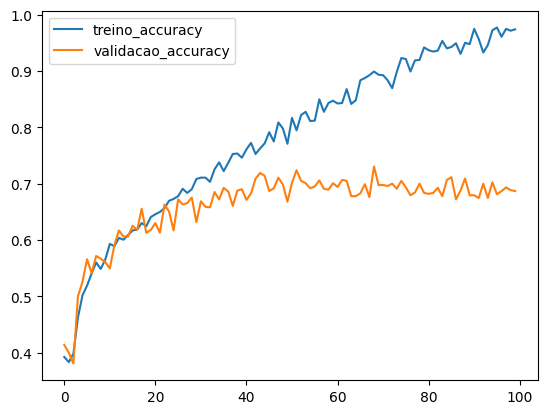

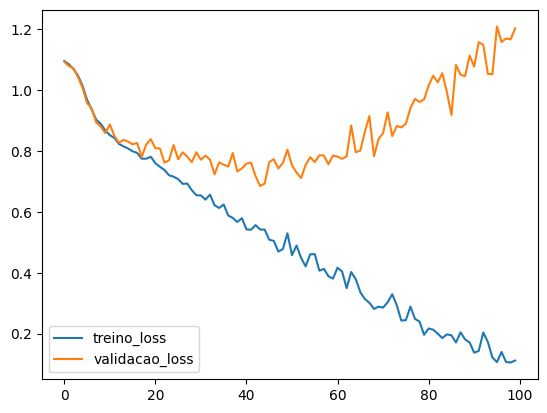

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

O resultado obtido foi muito similar ao do modelo com 1 camda convolucional. Parece haver uma pequena queda da métrica de acurácia na base de validação ao final das 100 épocas.

Além disso, olhando o valor da loss podemos ver um aumento da base de validação e a continua queda da base de treino. Novamente, isso indica um possível overfitting.

Podemos ver também as métrica de acurácia para as últimas 10 epocas na base de validação:

In [ ]:
media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

0.6865953947368422

O resultado foi de 68,6%, muito similar ao nosso modelo de baseline e levemente pior que o primeiro modelo. Considerando um intervalo de predição é capaz que todos estejam dentro da mesma faixa.

O ideal seria interromper o treinamento antes, no momento em que indentificassemos o overfitting. Provavelmente teriamos uma métrica de acurácia melhor.

Vamos criar outra CNN, mas agora com 3 camadas convolucionais. Queremos avaliar mais a fundo o efeito de adição de novas camadas convolucionais e também o efeito do tamanho do output da rede.

### Modelo CNN 3 Camadas Convolucionais

In [ ]:
class CNN_3(nn.Module):
  def __init__(self):
    super(CNN_3, self).__init__()


    self.conv1 = nn.Conv2d(3, 10, 3)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 3 + 2*0)/1 + 1 = 30'''


    self.activation1 = nn.ReLU()


    self.conv2 = nn.Conv2d(10, 10, 3)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (30 - 3 + 2*0)/1 + 1 = 28'''

    self.activation2 = nn.ReLU()


    #Adicionando uma terceira camada de Convolução
    self.conv3 = nn.Conv2d(10, 10, 3)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (28 - 3 + 2*0)/1 + 1 = 26'''

    self.activation3 = nn.ReLU()


    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (26 - 2 - 2*0)/2 + 1 = 13'''

    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(13*13*10, 120)
    self.activation2 = nn.ReLU()
    self.fc2 = nn.Linear(120, 3)


    # lastly, initialize the weights
    self._initialize_weights()

  def forward(self, x):
    x = self.conv1(x)
    x = self.activation1(x)
    x = self.conv2(x)
    x = self.activation2(x)
    x = self.conv3(x)
    x = self.activation3(x)
    x = self.pool1(x)
    x = self.flat(x)
    x = self.fc1(x)
    x = self.activation2(x)
    x = self.fc2(x)

    return x
    '''
    Executes a forward pass in the network with the input 'x'.
    'x' can be a batch or a single image in the expected input_shape.
    '''
    # TODO: return prediction of the network

  def _initialize_weights(self):
    '''
    Initialize the network weights using the Xavier initialization.
    '''
    for x in self.modules():
      if isinstance(x, nn.Linear):
        torch.nn.init.xavier_uniform_(x.weight.data)
        if (x.bias is not None):
          x.bias.data.zero_()

Instanciando o modelo;

In [ ]:
MyCNN = CNN_3()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

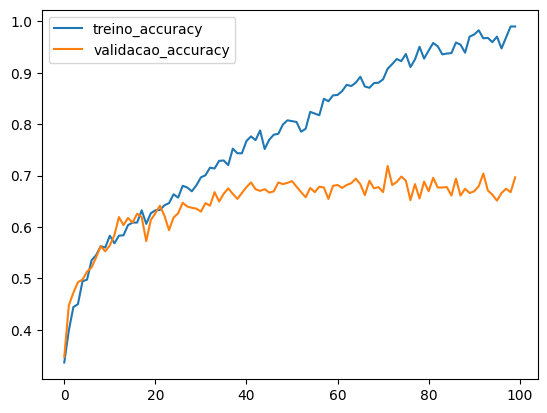

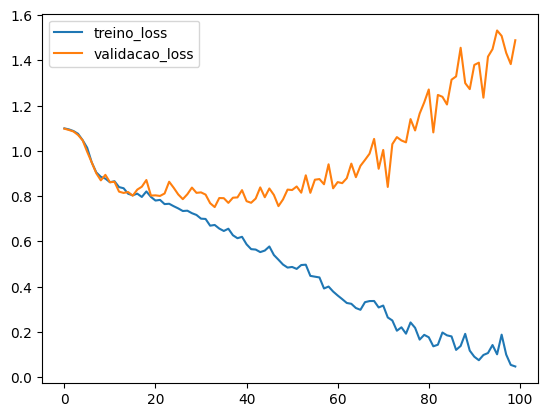

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

Para a adição de mais uma camada convolucional também fica claro a tendência de overfitting. Podemos ver isso pelo gráfico da Loss Function por dataframe. Ao final da épocas de treinamento o seu valor começa a subir e oscilar bastante.



In [ ]:
media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

0.6742598684210527

Novamente, o intervalo o valor da métrica de interesse ficou bem próximo aos anteriores.

# **Modificação do Kernel Size da Camada Convolucional**

Vamos testar a diminuição ou aumento do tamanho do kernel do filtro!

Vamos começar com o aumento do kernel size da camada convolucional. Se antes usamos um kernel de 3x3, vamos partir para um kernel 5X5.

### CNN com Kernel 5 x 5 nas camadas de convolução.

In [ ]:
class CNN_4(nn.Module):
  def __init__(self):
    super(CNN_4, self).__init__()


    '''Vamos aumentar o tamanho do kernel para 5'''
    self.conv1 = nn.Conv2d(3, 10, 5)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 5 + 2*0)/1 + 1 = 28'''

    self.activation1 = nn.ReLU()

    self.conv2 = nn.Conv2d(10, 10, 5)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (28 - 5 + 2*0)/1 + 1 = 24'''

    self.activation2 = nn.ReLU()


    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (24 - 2 - 2*0)/2 + 1 = 12'''


    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(12 * 12 *10, 120)
    self.activation2 = nn.ReLU()
    self.fc2 = nn.Linear(120, 3)

    # lastly, initialize the weights
    self._initialize_weights()

  def forward(self, x):
    x = self.conv1(x)
    x = self.activation1(x)
    x = self.conv2(x)
    x = self.activation2(x)
    x = self.pool1(x)
    x = self.flat(x)
    x = self.fc1(x)
    x = self.activation2(x)
    x = self.fc2(x)

    return x
    '''
    Executes a forward pass in the network with the input 'x'.
    'x' can be a batch or a single image in the expected input_shape.
    '''
    # TODO: return prediction of the network

  def _initialize_weights(self):
    '''
    Initialize the network weights using the Xavier initialization.
    '''
    for x in self.modules():
      if isinstance(x, nn.Linear):
        torch.nn.init.xavier_uniform_(x.weight.data)
        if (x.bias is not None):
          x.bias.data.zero_()

Instanciando o modelo.

In [ ]:
MyCNN = CNN_4()

if torch.cuda.is_available():
    MyCNN.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.7004111842105263

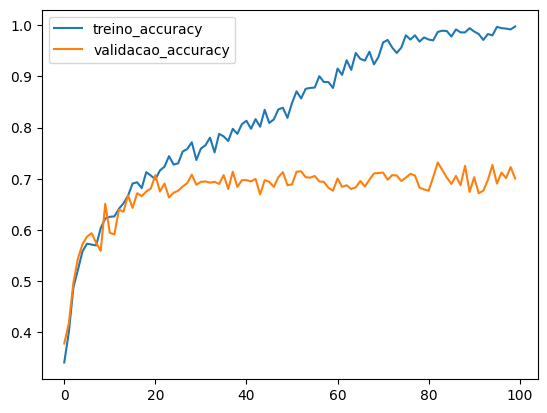

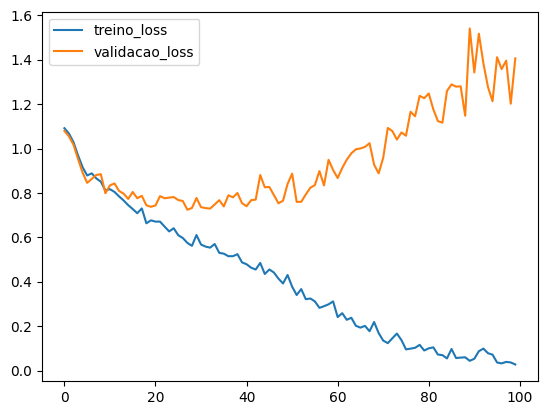

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

Os resultados obtidos foram bem similires ao modelo com 2 e 3 camadas de convolução. Novamente o valor da acurácia para a base de validação nas últimas 10 épocas foi bem próxima as anteriores.

Aqui parece haver uma tendência de maior velocidade de overfitting. A curva de validação cresce rapidamente após 50 epochs.

Testando com a diminuição do kernel de convolução.

Vamos usar um kernel de 1 x 1.

In [ ]:
class CNN_5(nn.Module):
  def __init__(self):
    super(CNN_5, self).__init__()


    '''Vamos aumentar o tamanho do kernel para 5'''
    self.conv1 = nn.Conv2d(3, 10, 1)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 1 + 2*0)/1 + 1 = 32'''

    self.activation1 = nn.ReLU()

    self.conv2 = nn.Conv2d(10, 10, 1)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 1 + 2*0)/1 + 1 = 32'''

    self.activation2 = nn.ReLU()


    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 2 - 2*0)/2 + 1 = 16'''


    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(16 * 16 *10, 120)
    self.activation2 = nn.ReLU()
    self.fc2 = nn.Linear(120, 3)

    # lastly, initialize the weights
    self._initialize_weights()

  def forward(self, x):
    x = self.conv1(x)
    x = self.activation1(x)
    x = self.conv2(x)
    x = self.activation2(x)
    x = self.pool1(x)
    x = self.flat(x)
    x = self.fc1(x)
    x = self.activation2(x)
    x = self.fc2(x)

    return x
    '''
    Executes a forward pass in the network with the input 'x'.
    'x' can be a batch or a single image in the expected input_shape.
    '''
    # TODO: return prediction of the network

  def _initialize_weights(self):
    '''
    Initialize the network weights using the Xavier initialization.
    '''
    for x in self.modules():
      if isinstance(x, nn.Linear):
        torch.nn.init.xavier_uniform_(x.weight.data)
        if (x.bias is not None):
          x.bias.data.zero_()

Instanciando o modelo.

In [ ]:
MyCNN = CNN_5()

if torch.cuda.is_available():
    MyCNN.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.6771381578947369

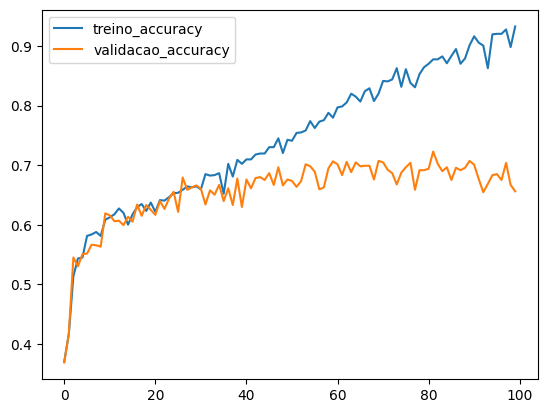

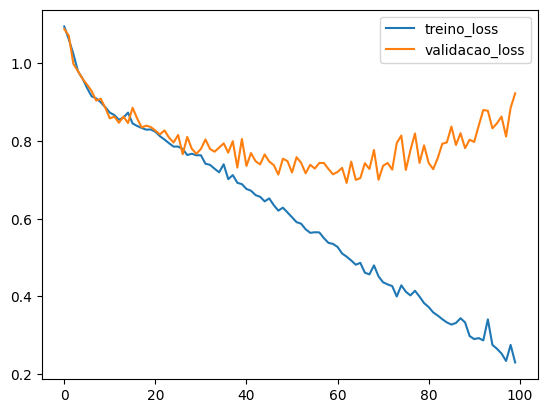

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

Novamente, os resultado foram bem similares.


A principal diferença é com relação ao "descolamento" das curvas de treino e validação. Para um kernel de tamanho menor isso parece acontecer em um número maior de épocas que os casos anteriores.

A métrica de acurácia obtida continua muito similar.

# **Testando para diferentes números de Epochs**


Vamos usar o primeiro modelo construido, com 1 camada convolucional.

Porém, agora, vamos testar como fica o comportamento para 50 e depois para 150 epocas. Já vimos como o modelo se comporta para 100, então a principal diferença será ver seu estado após 150 epochs.

### Testando para 50 épocas

In [ ]:
MyCNN = CNN_1()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40


<Axes: >

<Axes: >

0.6966282894736843

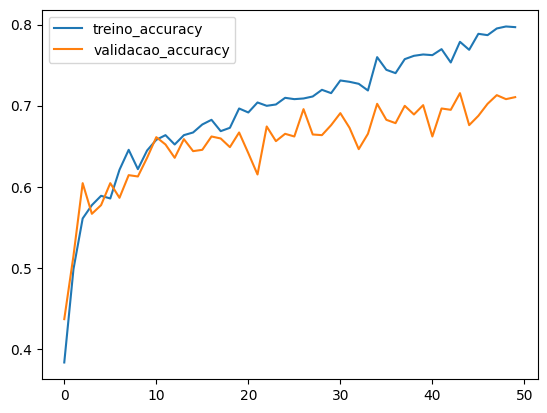

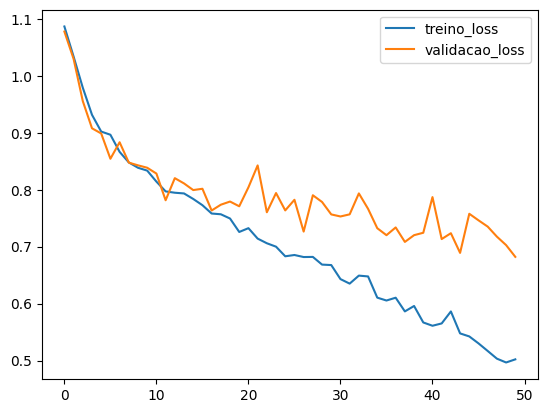

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

O resultado é muito similar ao primeiro modelo testado. As curvas começar a se descolar a partir de 20 a 30 épocas.

Parar aqui é quase similar ao early stop manual. A acurácidade na validação chega a 69%.

### Testando para 150 epocas

Instanciando de novo para fazer o reset dos parâmetros (pesos e bias)!

In [ ]:
MyCNN = CNN_1()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(150):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140


<Axes: >

<Axes: >

0.7189967105263158

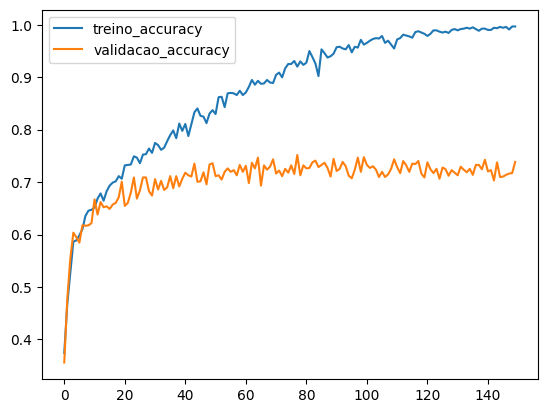

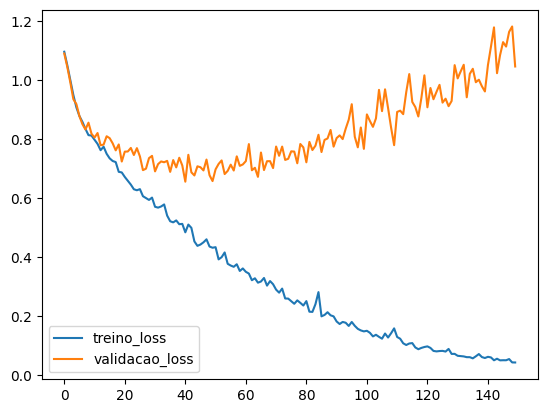

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

Realmente, obtivemos o comportamento esperado.

Conforme aumentamos o valor da épocas, aumentamos a possibilidade de overfitting; Ao final das 150 execuções a Loss de Validação e Treino está bem diferente.

AO final, a acurácia da base de treino tende a 1, equanto a da base de validação se estabiliza em 0.72.

# **Learning Rate**

Vamos mexer agora no Learning Rate. Vamos utilizar a primeira rede convolucional criada e ver com o hiperparâmetro afeta o resultado desejado.

É de se esperar que isso aumente ou diminua a velocidade de convergência.

### Vamos aumentar o LR = 0.01

In [ ]:
MyCNN = CNN_1()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.01, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.7064967105263158

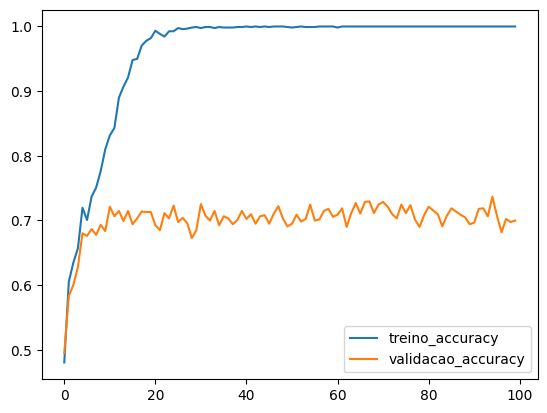

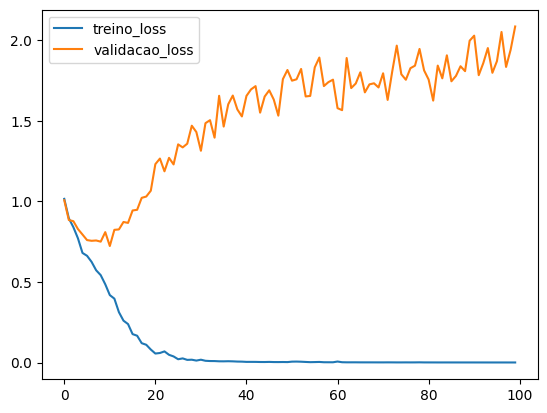

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

Fica claro como o aumento do LR leva a um aumento da velociade de convergência.

A base de treino "overfitta" com cerca de 10 epocas, fixando seu valor de acurácia em 1 e Loss em 0 com cerca de 20 epocas. A base de validação tem acurácia mais ou menos constante e a loss sobe até mais ou menos se estabilizar.

O valor da acurácia final é de cerca de 0.70, bem próximo aos modelos anteriores testados.

### Diminuindo o LR = 0.0001

In [ ]:
MyCNN = CNN_1()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.0001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.6550986842105264

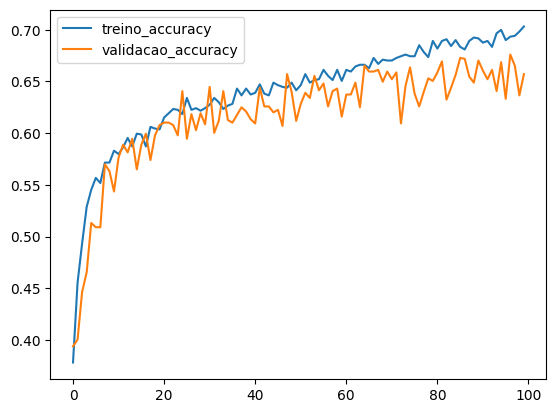

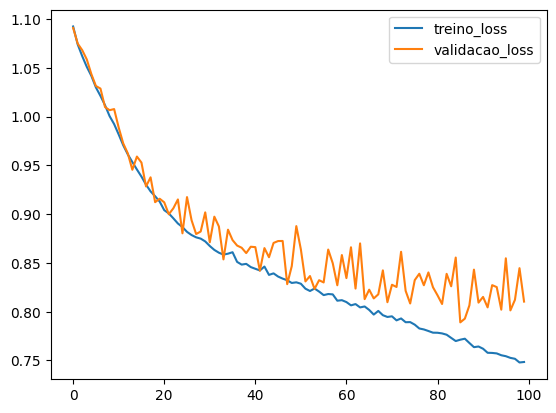

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

O efeito contrário ao esperado pelo aumento do LR.

A convergência ainda parece estar acontecendo nos dois gráficos.

Aqui sim, para o mesmo número de épocas, conseguimos ver um valor menor de acurácia na base de validação, pois ainda não convergiu, chegamos a 0.65.

# **Mexendo no Batch Size**

Primeiro vamos aumentar o tamanho do batch size para 64 observações. Vamos usar o modelo de 1 camada convolucional.

### Batch_size = 64

In [ ]:
#Treino
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)

#Validação
valid_dataloader = DataLoader(valid, batch_size=64, shuffle=True)

In [ ]:
MyCNN = CNN_1()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.7037828947368421

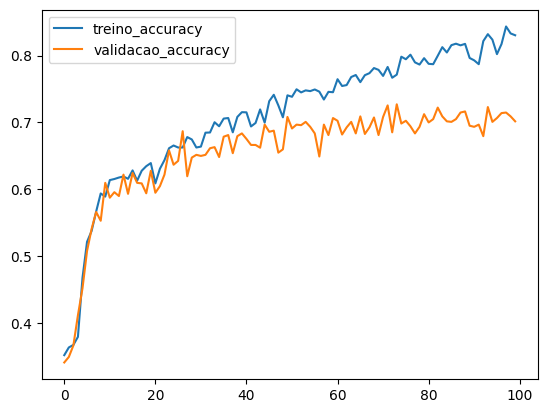

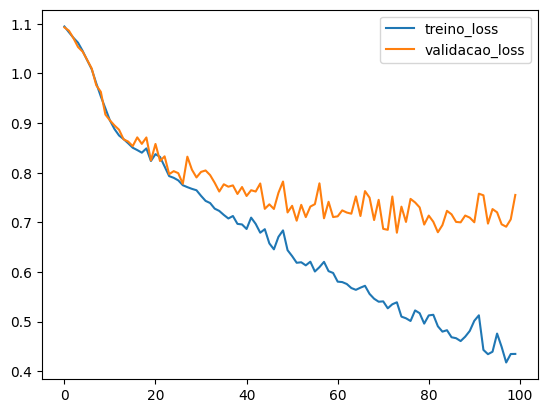

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

O aumento do tamanho de batchs diminui a "velocidade" com que viamos overfitting;

Se comparamos este com o primeiro caso testado, onde o batch_size era de 32, podemos ver uma diferença entre a distância entre as curvas de treino e validação.

Para o caso de 64 essa distância é bem menor.

Novamente, a métrica final de acurácia foi muito próxima, mas superior as demais, com 0.7.

### Batch_size = 16

In [ ]:
#Treino
train_dataloader = DataLoader(train, batch_size=16, shuffle=True)

#Validação
valid_dataloader = DataLoader(valid, batch_size=16, shuffle=True)

In [ ]:
MyCNN = CNN_1()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.7018333333333333

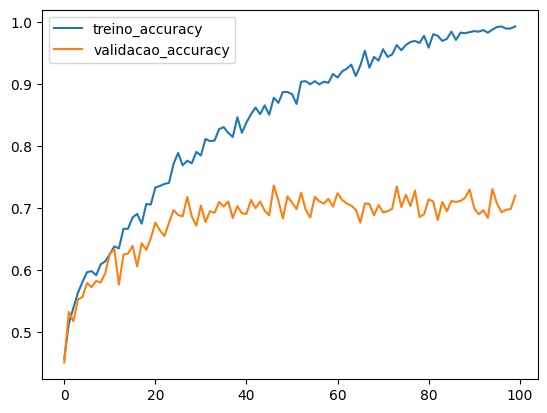

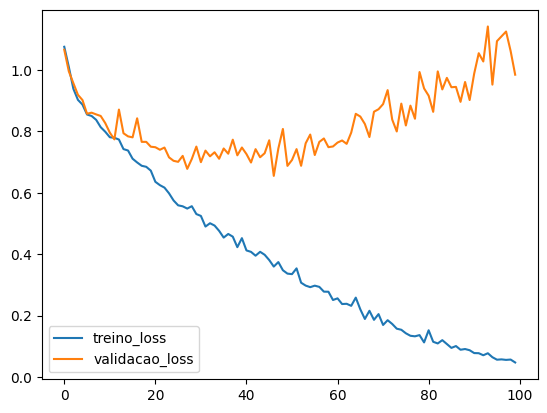

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

O efeito contrário foi observado aqui.

A diminuição do batch_size fez com que a distância entre as bases de treino e validação aumentasse, se estivessemos usando como base a mesma época.

Novamente, o valor da métrica foi bem similar com todos os outros casos.

# Stride na Camada convolucional

Vamos mexer agora em outro parâmetro, o stride.

Ele está presente nas camadas de Pooling e camadas convolucionais. Porém, como estamos "brincando" com múltiplos fatores, vamos nos restringir ao seu efeito nas camadas convolucionais.

Vamos testar como o aumento do stride afeta os resultados obtidos. Vamos usar o modelo primário como base, onde o stride é de 1!

Vamos testar com valores de stride de 2 e 3.

Talvez tenhamos que arredondar algumas saidas, pois não estamos usando padding.

### Stride nas camadas convolucionais igual a 2

In [ ]:
class CNN_6(nn.Module):
  def __init__(self):
    super(CNN_6, self).__init__()



    self.conv1 = nn.Conv2d(3, 10, 3, stride=2)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 3 - 2*0)/2 + 1 = 15.5 -> 15'''

    '''Adicionando a primeira camada de ativação. Vamos usar a ReLU'''
    self.activation1 = nn.ReLU()

    '''Adicionando a camada de Pooling. Vamos escolher um kernel_size  de 2x2. O padrão do stride é de ser do mesmo tamanho do kernel, logo, 2'''
    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (15 - 2 - 2*0)/2 + 1 = 7.5 -> 7 '''

    '''Achatando o tensor de saída'''
    self.flat = nn.Flatten()


    '''Adicionando a camada de achatamento. Também adicioando as camadas de saída que são do tamanho 15x15 com  10 mapas de caracteristicas'''
    self.fc1 = nn.Linear(7 * 7 * 10, 120)

    '''Adicionando uma outra camada de ativação'''
    self.activation2 = nn.ReLU()

    '''Adicionando a camada de saída'''
    self.fc2 = nn.Linear(120, 3)

    '''lastly, initialize the weights'''
    self._initialize_weights()

  def forward(self, x):
    x = self.conv1(x)
    x = self.activation1(x)
    x = self.pool1(x)
    x = self.flat(x)
    x = self.fc1(x)
    x = self.activation2(x)
    x = self.fc2(x)

    return x
    '''
    Executes a forward pass in the network with the input 'x'.
    'x' can be a batch or a single image in the expected input_shape.
    '''


  def _initialize_weights(self):
    '''
    Initialize the network weights using the Xavier initialization.
    '''
    for x in self.modules():
      if isinstance(x, nn.Linear):
        torch.nn.init.xavier_uniform_(x.weight.data)
        if (x.bias is not None):
          x.bias.data.zero_()

Vamos voltar com o tamanho do batch igual a 32.

In [ ]:
#Treino
train_dataloader = DataLoader(train, batch_size=32, shuffle=True)

#Validação
valid_dataloader = DataLoader(valid, batch_size=32, shuffle=True)

Instanciando o modelo.

In [ ]:
MyCNN = CNN_6()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.6884868421052632

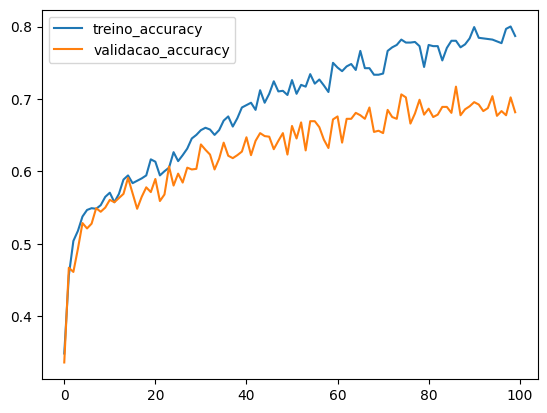

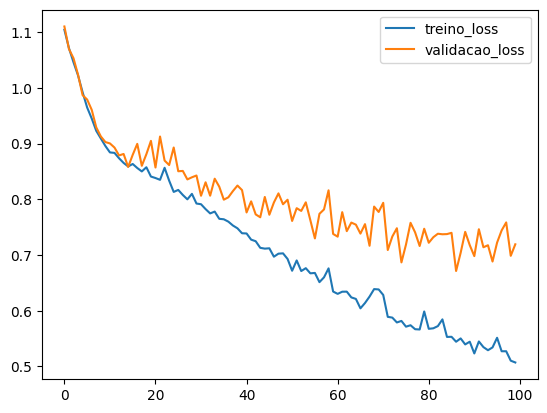

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

O aumento do tamanho de stride parece ter adiado a ocorrência do overfitting.

As curvas parecem mais próximas, mas se continuassemos treinando é bem capaz que cairiamos no mesmo caso que os anteriores, pois o modelo parece ainda não ter convergido.

Por fim, a mudança do tamanho do stride não parece ter afetado o resultado de acurácia final, ficando próximo aos casos anteriores.

### Modelo com stride = 3

In [ ]:
class CNN_7(nn.Module):
  def __init__(self):
    super(CNN_7, self).__init__()



    self.conv1 = nn.Conv2d(3, 10, 3, stride=3)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 3 - 2*0)/3 + 1 = 10.66 -> 10'''

    '''Adicionando a primeira camada de ativação. Vamos usar a ReLU'''
    self.activation1 = nn.ReLU()

    '''Adicionando a camada de Pooling. Vamos escolher um kernel_size  de 2x2. O padrão do stride é de ser do mesmo tamanho do kernel, logo, 2'''
    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (10 - 2 - 2*0)/2 + 1 = 5 '''

    '''Achatando o tensor de saída'''
    self.flat = nn.Flatten()


    '''Adicionando a camada de achatamento. Também adicioando as camadas de saída que são do tamanho 15x15 com  10 mapas de caracteristicas'''
    self.fc1 = nn.Linear(5 * 5  * 10, 120)

    '''Adicionando uma outra camada de ativação'''
    self.activation2 = nn.ReLU()

    '''Adicionando a camada de saída'''
    self.fc2 = nn.Linear(120, 3)

    '''lastly, initialize the weights'''
    self._initialize_weights()

  def forward(self, x):
    x = self.conv1(x)
    x = self.activation1(x)
    x = self.pool1(x)
    x = self.flat(x)
    x = self.fc1(x)
    x = self.activation2(x)
    x = self.fc2(x)

    return x
    '''
    Executes a forward pass in the network with the input 'x'.
    'x' can be a batch or a single image in the expected input_shape.
    '''


  def _initialize_weights(self):
    '''
    Initialize the network weights using the Xavier initialization.
    '''
    for x in self.modules():
      if isinstance(x, nn.Linear):
        torch.nn.init.xavier_uniform_(x.weight.data)
        if (x.bias is not None):
          x.bias.data.zero_()

In [ ]:
MyCNN = CNN_7()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.7090460526315789

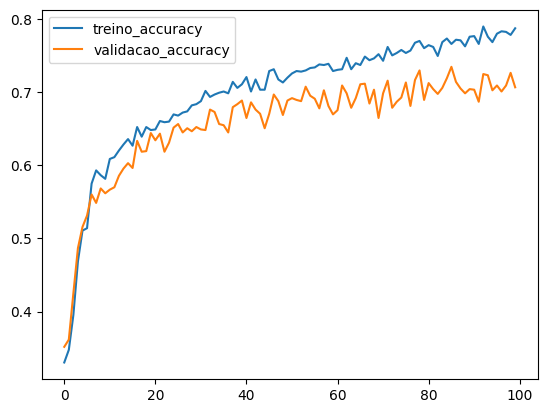

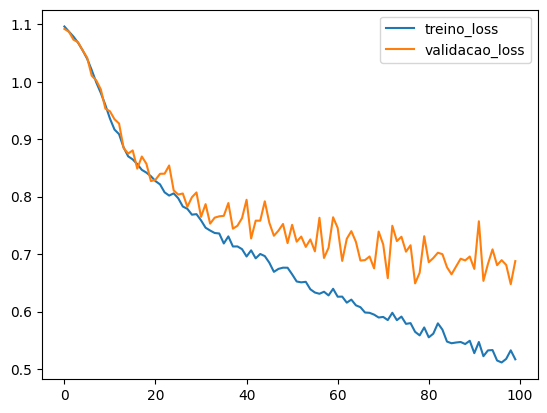

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

O resultado do aumento do tamanho do stride foi muito similar ao anterior.

Não parece, pelo menos graficamente, haver diferenças entre o uso de stride igual a 2 ou 3.

O resultado da acurácia continua na mesma faixa, entre 0.65 e 0.70.

# **Alteração da aquitetura da parte densa**

Vamos agora alterar outra parte da CNN, as camadas densas.

Nosso modelo base trabalha com 1 camada de achatamento e 1 camada densa conectada a camada de saída.

Vamos avaliar o que a adição de mais 1 camada densa muda em nosso resultado de interese.

### Adicionando uma camada oculta totalmente conectada a CNN

In [ ]:
class CNN_8(nn.Module):
  def __init__(self):
    super(CNN_8, self).__init__()



    self.conv1 = nn.Conv2d(3, 10, 3, stride=3)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 3 - 2*0)/3 + 1 = 10.66 -> 10'''

    '''Adicionando a primeira camada de ativação. Vamos usar a ReLU'''
    self.activation1 = nn.ReLU()

    '''Adicionando a camada de Pooling. Vamos escolher um kernel_size  de 2x2. O padrão do stride é de ser do mesmo tamanho do kernel, logo, 2'''
    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (10 - 2 - 2*0)/2 + 1 = 5 '''

    '''Achatando o tensor de saída'''
    self.flat = nn.Flatten()


    '''Adicionando a camada de achatamento. Também adicioando as camadas de saída que são do tamanho 15x15 com  10 mapas de caracteristicas'''
    self.fc1 = nn.Linear(5 * 5  * 10, 120)

    '''Adicionando uma outra camada de ativação'''
    self.activation2 = nn.ReLU()


    self.fc2 = nn.Linear(120, 80)

    '''Adicionando uma outra camada de ativação'''
    self.activation3 = nn.ReLU()


    '''Adicionando a camada de saída'''
    self.fc3 = nn.Linear(80,3)

    '''lastly, initialize the weights'''
    self._initialize_weights()

  def forward(self, x):
    x = self.conv1(x)
    x = self.activation1(x)
    x = self.pool1(x)
    x = self.flat(x)
    x = self.fc1(x)
    x = self.activation2(x)
    x = self.fc2(x)
    x = self.activation3(x)
    x = self.fc3(x)

    return x
    '''
    Executes a forward pass in the network with the input 'x'.
    'x' can be a batch or a single image in the expected input_shape.
    '''


  def _initialize_weights(self):
    '''
    Initialize the network weights using the Xavier initialization.
    '''
    for x in self.modules():
      if isinstance(x, nn.Linear):
        torch.nn.init.xavier_uniform_(x.weight.data)
        if (x.bias is not None):
          x.bias.data.zero_()

In [ ]:
MyCNN = CNN_8()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.7144736842105261

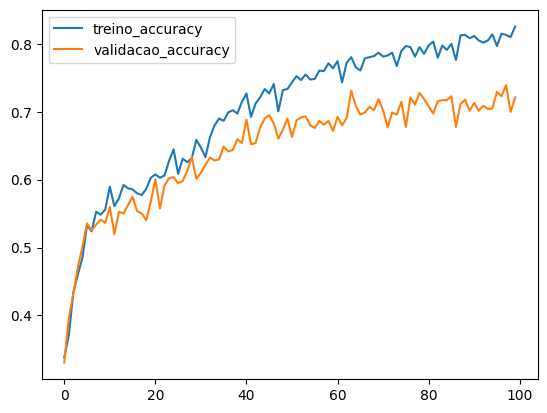

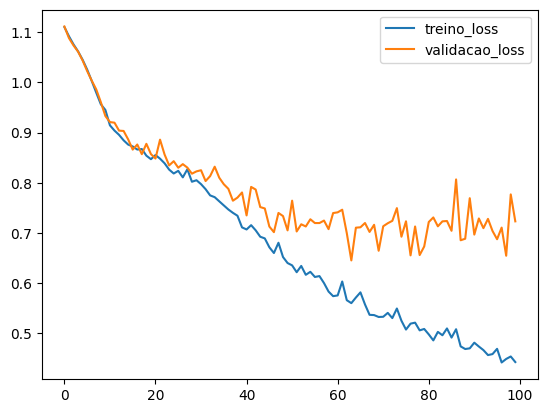

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

A adição da camada densa parece ter diminuido a diferença entre o treino e validação.

O resultado parece promissor, poderiamos ter testado para mais epochs para ver o resultado final.

A acurácia continua dentro do intervalo obtido nas outras execuções, porém maior, com 0.71;

### Sem camada densa


Vamos fazer um modelo que se conecta diretamente com a camada de saída

In [ ]:
class CNN_9(nn.Module):
  def __init__(self):
    super(CNN_9, self).__init__()



    self.conv1 = nn.Conv2d(3, 10, 3, stride=3)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 3 - 2*0)/3 + 1 = 10.66 -> 10'''

    '''Adicionando a primeira camada de ativação. Vamos usar a ReLU'''
    self.activation1 = nn.ReLU()

    '''Adicionando a camada de Pooling. Vamos escolher um kernel_size  de 2x2. O padrão do stride é de ser do mesmo tamanho do kernel, logo, 2'''
    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (10 - 2 - 2*0)/2 + 1 = 5 '''

    '''Achatando o tensor de saída'''
    self.flat = nn.Flatten()


    '''Adicionando a camada de achatamento. Também adicioando as camadas de saída que são do tamanho 15x15 com  10 mapas de caracteristicas'''
    self.fc1 = nn.Linear(5 * 5  * 10, 3)

    '''lastly, initialize the weights'''
    self._initialize_weights()

  def forward(self, x):
    x = self.conv1(x)
    x = self.activation1(x)
    x = self.pool1(x)
    x = self.flat(x)
    x = self.fc1(x)

    return x
    '''
    Executes a forward pass in the network with the input 'x'.
    'x' can be a batch or a single image in the expected input_shape.
    '''


  def _initialize_weights(self):
    '''
    Initialize the network weights using the Xavier initialization.
    '''
    for x in self.modules():
      if isinstance(x, nn.Linear):
        torch.nn.init.xavier_uniform_(x.weight.data)
        if (x.bias is not None):
          x.bias.data.zero_()

In [ ]:
MyCNN = CNN_9()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.6738486842105263

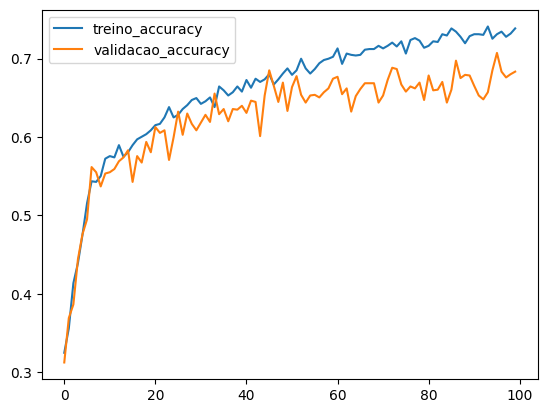

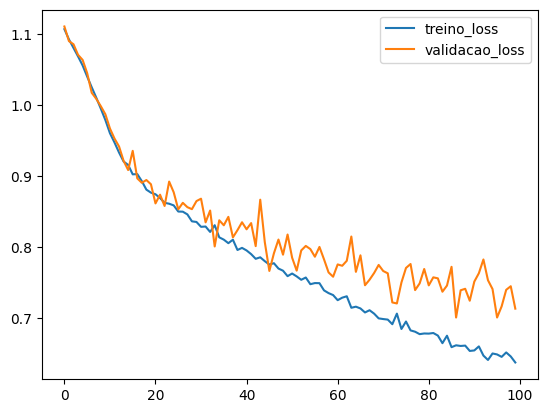

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

A conexão direta da parte convolucional com a saída fez com que as curvas ficassem bem próximas.

O modelo ainda parece estar convergindo para o melhor resultado e a acurácia encontrada foi de 0.67;

# **Usando Data Augmentation**

Vamos agora usar técnicas de data augmentation e avaliar seu efeito na métrica de interese.

Já preperamos esse método lá em cima, mas vamos adicionar as imagens com as transformações em nosso dataset de treino e ver como isso afeta o resultado final.

Faremos uma mudança na execução de treinamento de maneira que ele passe pelo dados normais e aumentados em cada batch.

Utilizaremos o modelo base, sendo o primeiro modelo treinado.

In [ ]:
#Treino
train_augmentation = ImageDataset('train', augmentation)

Concatenando os dados normais e aumentados

In [ ]:
from torch.utils.data import ConcatDataset
concat_dataset = ConcatDataset([train, train_augmentation])

In [ ]:
train_dataloader_aug = DataLoader(concat_dataset, batch_size=32, shuffle=True)

In [ ]:
MyCNN = CNN_1()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader_aug, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.7014583333333333

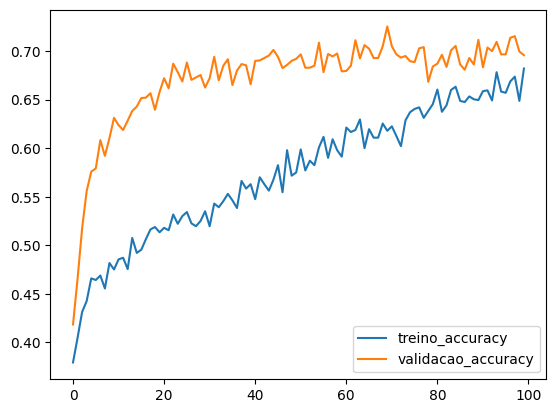

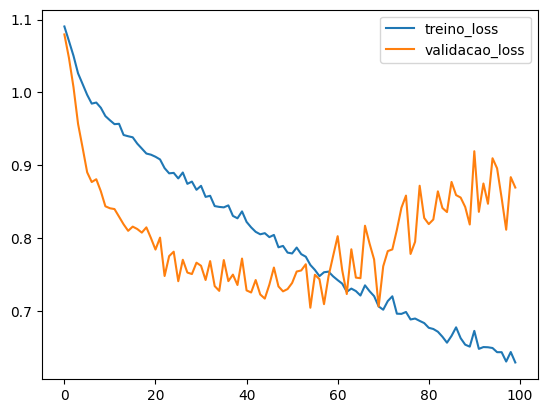

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

Os resultados obtidos tiveram um comportamento diferente das demais. Em boa parte do treinamento a curva de validação teve um melhor desempenho que a curva de treinamento.

Isso provavelmente advem do fato de que a validação tem casos mais "fáceis" para indentificar, que o treino, uma vez que adicionamos imagens modificadas. A curva para a acurácia na validação parece se estebelecer a partir de 40 épocas, no mesmo momento que a cuva da Loss começa a subir.

A curva de treino tem seu comportamento habitual, subindo para a acurácia e descendo para a Loss;

A métrica de interesse subiu para 0.7, dentro do intervalos dos resultados obtidos anteriormentes.

# Acurácia Balanceada

Por fim, como requerimento do modelo foi pedido para modificar a função criterion para retornar a acurácia balanceda.

Vamos refazer o treinamento do ultimo modelo e retornar a acurácia balanceada.

In [ ]:

def Criterion_Balanced(model, preds, targets, device):
  '''
  Function that calculates the loss and accuracy of a batch predicted by the model.
  '''
  ce            = nn.CrossEntropyLoss().to(device) # You don't need to change the loss function (but you can if it makes sense on your analysis)
  loss          = ce(preds, targets.long())
  pred_labels   = torch.max(preds.data, 1)[1] # same as argmax
  acc_balanced  = balanced_accuracy_score(pred_labels, targets)

  return loss, acc_balanced


In [ ]:
MyCNN = CNN_1()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion_Balanced, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion_Balanced, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90


<Axes: >

<Axes: >

0.7139639856022046

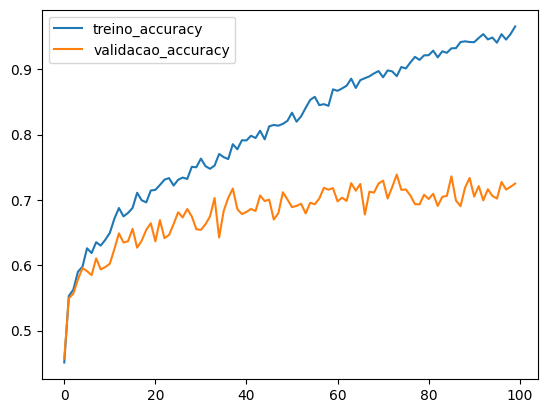

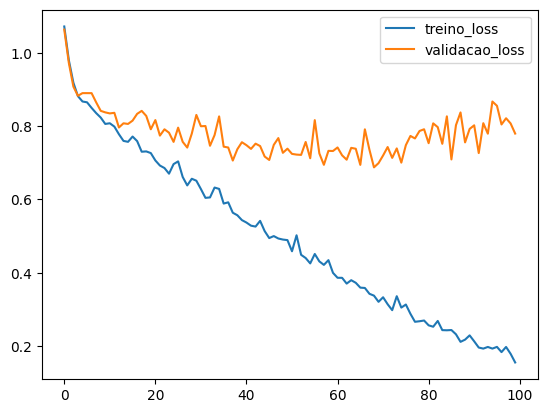

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

Novamente o comportamento acaba sendo muito parecido com os das curvas ja demostradas.

A acurárcia balanceada é mostrada no primeiro gráfico, onde o resultado médio das últimas 10 epocas retornou 0.71, ainda muito próximo do resultados obtidos anteriormente.

### Early stoping regularization (EXTRA: 1 Point)

This can only be done if you are able to find a CNN that was able to overfit the train dataset.

If that is the case, change the training function in order to perform an [early stopping](https://en.wikipedia.org/wiki/Early_stopping). The early stopping technique using validation is a technique to stop the training process when a defined condition is achieved. Find this condition and change the code.

Discuss the results and why they happened (it works? Why?)


Vamos agora utlizar os casos que observamos de rápido overfitting.

Vamos escolher a rede neural de 2 camadas e também um LR de 0.01, ambos onde a tendência de overfitting ficou bem clara.

Também vamos rodar para 150 épocas, para deixar o efeito bem visivel. Depois disso, vamos modificar a função para que, se estabelecido um parâmetro de parada, encerre a execução e retorne o resultado de interesse.

In [ ]:
MyCNN = CNN_2()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.01, momentum=0.9)

Executando por 150 epochs

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(150):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])


    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140


<Axes: >

<Axes: >

0.6741776315789474

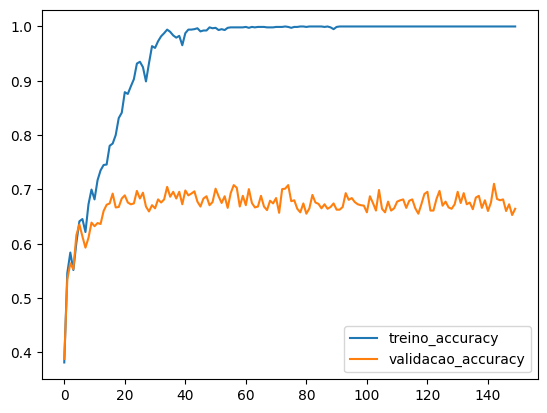

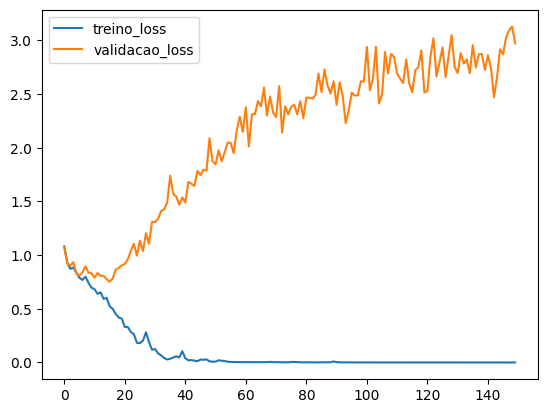

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

Podemos ver claramente como a curva de acuracidade para a base de treino chega a 1 rapidamente. Além disso, podemos ver a curva de Loss para a base de validação que cai por um breve momento, mas logo após volta a subir.

Vamos agora implementar um método de early stopping.

In [ ]:
MyCNN = CNN_2()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.01, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)

    if epoch > 10:
      '''Calculando a Loss do Conjunto de validação por epoca'''
      partial_loss = [np.mean(i) for i in acc['validacao_loss']]

      '''Calculando uma méida movel da loss usando as últimas 5 epocas'''
      avg_10_loss =  [np.mean(partial_loss[x:x+10]) for x in range(epoch-10)]

      ''' Avalia se o houve aumento da Loss durante o treinamento'''
      if (len(avg_10_loss) > 1):
        # print((avg_5_loss[epoch - 11]/avg_5_loss[epoch - 12]))
        if ((avg_10_loss[epoch - 11]/avg_10_loss[epoch - 12]) - 1 >= 0.01):
          break
      else:
        pass


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])



    for i, data in enumerate(train_dataloader, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)




      # if np.mean(acc['validacao_loss'][epoch]) > 1.3*np.mean(acc['validacao_loss'][epoch - 1]):

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10


Primeiramente fizemos uma suavização da curva de Loss para que oscilações normais do processo de ajuste de parâmetros não levassem a conclusões erradas. Para isso calculamos a média movel para cada ponto das 10 últimas métricas de peda para a base de validação.

Em seguida, fazemos uma comparação, avaliando se há uma tendência de alta constante no valor da Loss na validação. Caso ele ultrapasse um threshold, paramos a execução do código.

Essa lógica vai conseguir identificar o momento em que as curvas de treino e validação começar a se descolar, indentificando o começo do overfitting. Isso provavelmente também vai equivaler ao momento em que temos o melhor ajuste de parâmetros do modelo, obtendo o melhor valor da métrica de interesse.

Podemos ver a métrica da loss média das últimas 10 épocas para cada execução do código.

<Axes: >

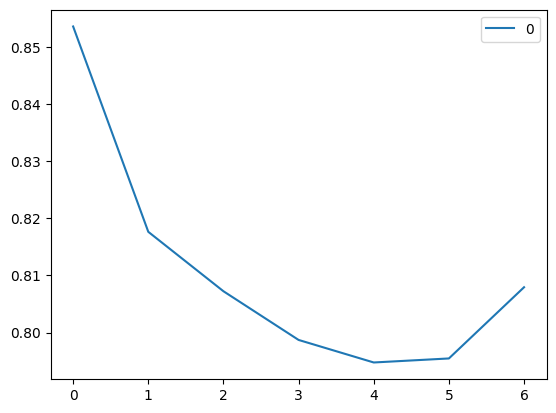

In [ ]:
pd.DataFrame(avg_10_loss).plot()

<Axes: >

<Axes: >

0.6855263157894738

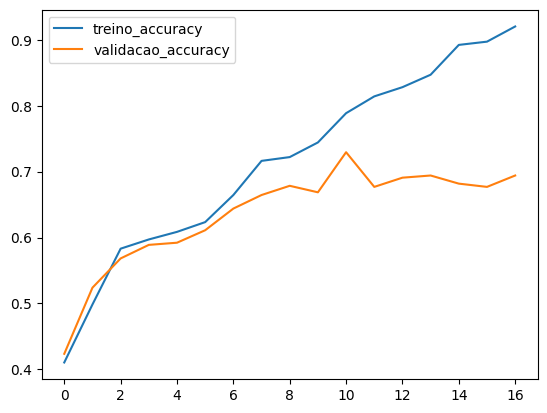

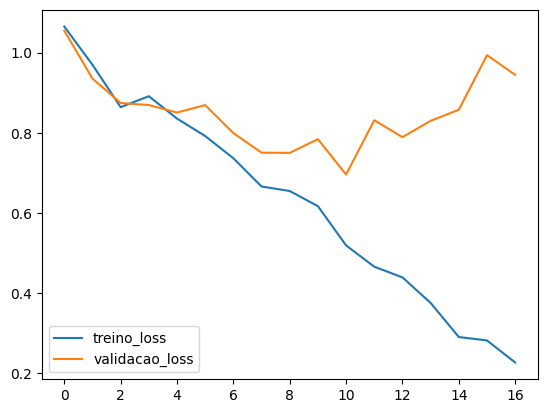

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-10:].mean()
media_10_ultimas_epoch_valid

Podemos ver que o modelo para de ser executado com cerca de 16 épocas, no mesmo momento em que a curva de loss de validação tem a tendência de alta.

# Modelo escolhido e resultado na base de teste


Com base nos resultado obtidos vamos escolher a arquitetura do nosso modelo final:

- 3 camadas convolucionais
- kernel convolucional de 3x3
- 150 épocas
- Learning Rate de 0.01
- Batch Size de 64
- Stride na camada convolucional de 1
- 2 camada densas
- Data augmentation
- Acurácia balanceada
- Aplicação de Early Stop

In [ ]:
train_dataloader_aug = DataLoader(concat_dataset, batch_size=64, shuffle=True)

In [ ]:
class CNN_final(nn.Module):
  def __init__(self):
    super(CNN_final, self).__init__()



    self.conv1 = nn.Conv2d(3, 10, 3, stride=1)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (32 - 3 - 2*0)/1 + 1 = 30 '''

    '''Adicionando a primeira camada de ativação. Vamos usar a ReLU'''
    self.activation1 = nn.ReLU()

    self.conv2 = nn.Conv2d(10, 10, 3, stride=1)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (30 - 3 - 2*0)/3 + 1 = 28'''

    '''Adicionando a segunda camada de ativação. Vamos usar a ReLU'''
    self.activation2 = nn.ReLU()

    self.conv3 = nn.Conv2d(10, 10, 3, stride=1)
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (28 - 3 - 2*0)/3 + 1 = 26'''

    '''Adicionando a primeira camada de ativação. Vamos usar a ReLU'''
    self.activation3 = nn.ReLU()

    '''Adicionando a camada de Pooling. Vamos escolher um kernel_size  de 2x2. O padrão do stride é de ser do mesmo tamanho do kernel, logo, 2'''
    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
    '''Dimensão da saida = (N - K + 2P)/S + 1 = (26 - 2 - 2*0)/2 + 1 = 13 '''

    '''Achatando o tensor de saída'''
    self.flat = nn.Flatten()


    '''Adicionando a camada de achatamento. Também adicioando as camadas de saída que são do tamanho 15x15 com  10 mapas de caracteristicas'''
    self.fc1 = nn.Linear(13 * 13 * 10, 120)

    '''Adicionando uma outra camada de ativação'''
    self.activation4 = nn.ReLU()


    self.fc2 = nn.Linear(120, 80)

    '''Adicionando uma outra camada de ativação'''
    self.activation5 = nn.ReLU()


    '''Adicionando a camada de saída'''
    self.fc3 = nn.Linear(80,3)

    '''lastly, initialize the weights'''
    self._initialize_weights()

  def forward(self, x):
    x = self.conv1(x)
    x = self.activation1(x)
    x = self.conv2(x)
    x = self.activation2(x)
    x = self.conv3(x)
    x = self.activation3(x)
    x = self.pool1(x)
    x = self.flat(x)
    x = self.fc1(x)
    x = self.activation4(x)
    x = self.fc2(x)
    x = self.activation5(x)
    x = self.fc3(x)

    return x
    '''
    Executes a forward pass in the network with the input 'x'.
    'x' can be a batch or a single image in the expected input_shape.
    '''


  def _initialize_weights(self):
    '''
    Initialize the network weights using the Xavier initialization.
    '''
    for x in self.modules():
      if isinstance(x, nn.Linear):
        torch.nn.init.xavier_uniform_(x.weight.data)
        if (x.bias is not None):
          x.bias.data.zero_()

In [ ]:
MyCNN = CNN_final()

if torch.cuda.is_available():
    MyCNN.cuda()

optimizer = optim.SGD(MyCNN.parameters(), lr=0.01, momentum=0.9)

In [ ]:
acc = {'treino_loss': [], 'validacao_loss': [], 'treino_accuracy': [], 'validacao_accuracy': []}
for epoch in range(150):  # loop over the dataset multiple times

    running_loss = 0.0

    if epoch % 10 == 0.0:
      print(epoch)

    if epoch > 10:
      '''Calculando a Loss do Conjunto de validação por epoca'''
      partial_loss = [np.mean(i) for i in acc['validacao_loss']]

      '''Calculando uma méida movel da loss usando as últimas 10 epocas'''
      avg_10_loss =  [np.mean(partial_loss[x:x+10]) for x in range(epoch-10)]

      ''' Avalia se o houve aumento da Loss durante o treinamento'''
      if (len(avg_10_loss) > 1):
        # print((avg_5_loss[epoch - 11]/avg_5_loss[epoch - 12]))
        if ((avg_10_loss[epoch - 11]/avg_10_loss[epoch - 12]) - 1 >= 0.01):
          break
      else:
        pass


    acc['treino_loss'].append([])
    acc['validacao_loss'].append([])
    acc['treino_accuracy'].append([])
    acc['validacao_accuracy'].append([])



    for i, data in enumerate(train_dataloader_aug, 0):
      loss, acc_treino = train_batch(MyCNN, data, optimizer, Criterion_Balanced, device)
      acc['treino_loss'][epoch].append(loss)
      acc['treino_accuracy'][epoch].append(acc_treino)
      loss, acc_valid = validate_batch(MyCNN, next(iter(valid_dataloader)), Criterion_Balanced, device)
      acc['validacao_loss'][epoch].append(loss)
      acc['validacao_accuracy'][epoch].append(acc_valid)




      # if np.mean(acc['validacao_loss'][epoch]) > 1.3*np.mean(acc['validacao_loss'][epoch - 1]):

acc['treino_loss'] = [np.mean(i) for i in acc['treino_loss']]
acc['validacao_loss'] = [np.mean(i) for i in acc['validacao_loss']]

acc['treino_accuracy'] = [np.mean(i) for i in acc['treino_accuracy']]
acc['validacao_accuracy'] = [np.mean(i) for i in acc['validacao_accuracy']]

0
10
20


<Axes: >

<Axes: >

0.6806818715134395

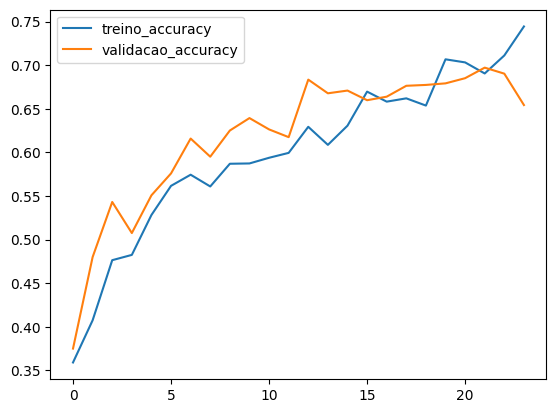

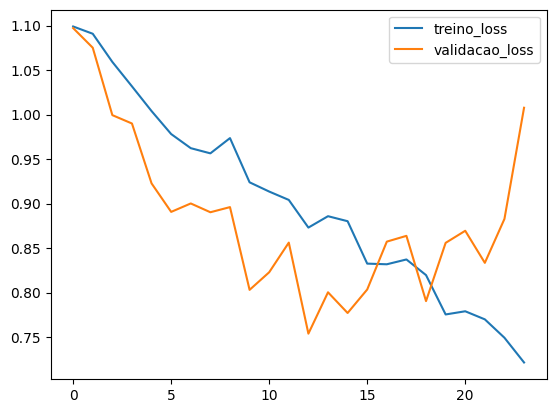

In [ ]:
display(pd.DataFrame(acc)[['treino_accuracy', 'validacao_accuracy']].plot())
display(pd.DataFrame(acc)[['treino_loss', 'validacao_loss']].plot())

media_10_ultimas_epoch_valid = pd.DataFrame(acc)['validacao_accuracy'][-3:].mean()
media_10_ultimas_epoch_valid

O resultado final do modelo na base de teste foi de: 0.68

Muito próximo ao nosso modelo do baseline usando RandomForest. Poderiamos ter testado mais arquiteturas de maneira a tentar bater o baseline;

## Interpertability on CNNs (1 point)

The Gradient-weighted Class Activation Mapping (Grad-CAM) technique uses the gradient of one or more convolutional layers to highlight the regions of the image that were more impactful to a prediction. For more details, you can read [this paper](https://arxiv.org/abs/1610.02391).

The idea is to use the gradient to create a heatmap indicating the parts that had more weight on the decision for a given sample.

In the next cells, the Grad-CAM code is defined for one layer. You should use this code to test a few images of your best CNN defined in the previous sections. You can change the visualizations if you want.

Analyze the results of Grad-CAM for different images and classes, and discuss whether the model is focusing or not on the right parts of the image and why this may be happening. Feel free to change the code below to visualize in a different way (different quantity of images, different labeling, etc).

-------

**Important: The code below has some assumptions about the network architecture. If the model class is built in a different way you MUST change the implementation of the `get_activations` function.**

In [ ]:

labels_map = {
  0: "Airplane",
  1: "Bird",
  2: "Cat",
}


def get_activations(model, image, device):
  '''
  This function return the activations for a given image.
  The assumption is that there is a "features" attribute that contains the convolutional part of the network.
  If this is not the case of your network, change the code below to run the network until the last convolutional layer (with activations), and return it.
  "image" is the selected image to get activations
  "device" is the device where the model is running (to use the GPU when available)
  '''
  # move input tensor x to the selected device
  image = image.to(device)
  # get activations after feature extraction
  model.eval()

  with torch.no_grad():
    x = model.conv1(image)
    x = model.activation1(x)
    img_activations = model.conv2(x)

  return img_activations

def get_output_of_the_model(model, image, device):
  '''
  This function is just a "forward" call in "eval" mode, in order to have the predictions for a given image.
  '''
  # put the model in the evaluation mode
  model.eval()
  # move input tensor x to the selected device
  image = image.to(device)
  # execute the model with gradients
  output = model(image)
  return(output)

def get_activ(layer, target_layer, activ):
  '''
  This function will recursively search for the layer to be used in gradcam and compute the mean gradient of the output channels.
  '''
  if target_layer == layer:
    grad = layer.weight.grad

    for i in range(activ.shape[1]):
      activ[:,i,:,:] *= grad[i].mean()
      return activ
  else:
    # check another layer
    if hasattr(layer, '__getitem__'): #__iter__
      for in_layer in layer:
        activ = get_activ(in_layer,target_layer,activ)
        if activ != None:
          return activ

  return None

def get_heatmap(model, image, target_layer, device):
  '''
  Find a heatmap for a given image and target_layer of the model.
  "device" is the device where the model is running (to use GPU when available)
  '''
  image_in = image.unsqueeze(0)

  # get the output of the feature extractor
  activ  = get_activations(model, image_in, device)

  # get the predictions at the output of the decision layer
  logits = get_output_of_the_model(model, image_in, device)

  # get the most confident prediction
  pred   = logits.max(-1)[-1]

  model.zero_grad()
  logits[0,pred].backward(retain_graph=True)

  for layer in model.children():
    res = get_activ(layer, target_layer, activ)
    if res != None:
      break

  if res == None:
    raise Exception("Layer not found!")

  heatmap = torch.mean(res, dim=1)[0].cpu().detach()

  heatmap = heatmap.squeeze(0).numpy()
  # normalize image with minmax
  heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
  # Resize figure to be in the same size as the input image
  heatmap = cv2.resize(heatmap, (image.shape[2], image.shape[1]))

  return (heatmap, labels_map[pred.cpu().detach().numpy()[0]])

def display_image_with_heatmap(img, heatmap, scale, ax, true_label, predicted_label):
  '''
  Display the image with the heatmap in a given scale, with labels.
  '''
  heatmap = np.uint8(255.0*heatmap)
  width   = int(heatmap.shape[1]*scale)
  height  = int(heatmap.shape[0]*scale)
  heatmap = cv2.resize(heatmap, (width, height))
  img     = 255*(img - np.min(img))/(np.max(img)-np.min(img))
  img     = cv2.resize(img, (width, height))
  heatmap = cv2.applyColorMap(255-heatmap, cv2.COLORMAP_JET)
  heatmap = np.uint8(heatmap)
  heatmap = np.uint8(heatmap*0.3 + img*0.7)

  ax.imshow(heatmap)
  ax.set_title("True: " + true_label + " || Predicted:" + predicted_label,{'fontsize':25})


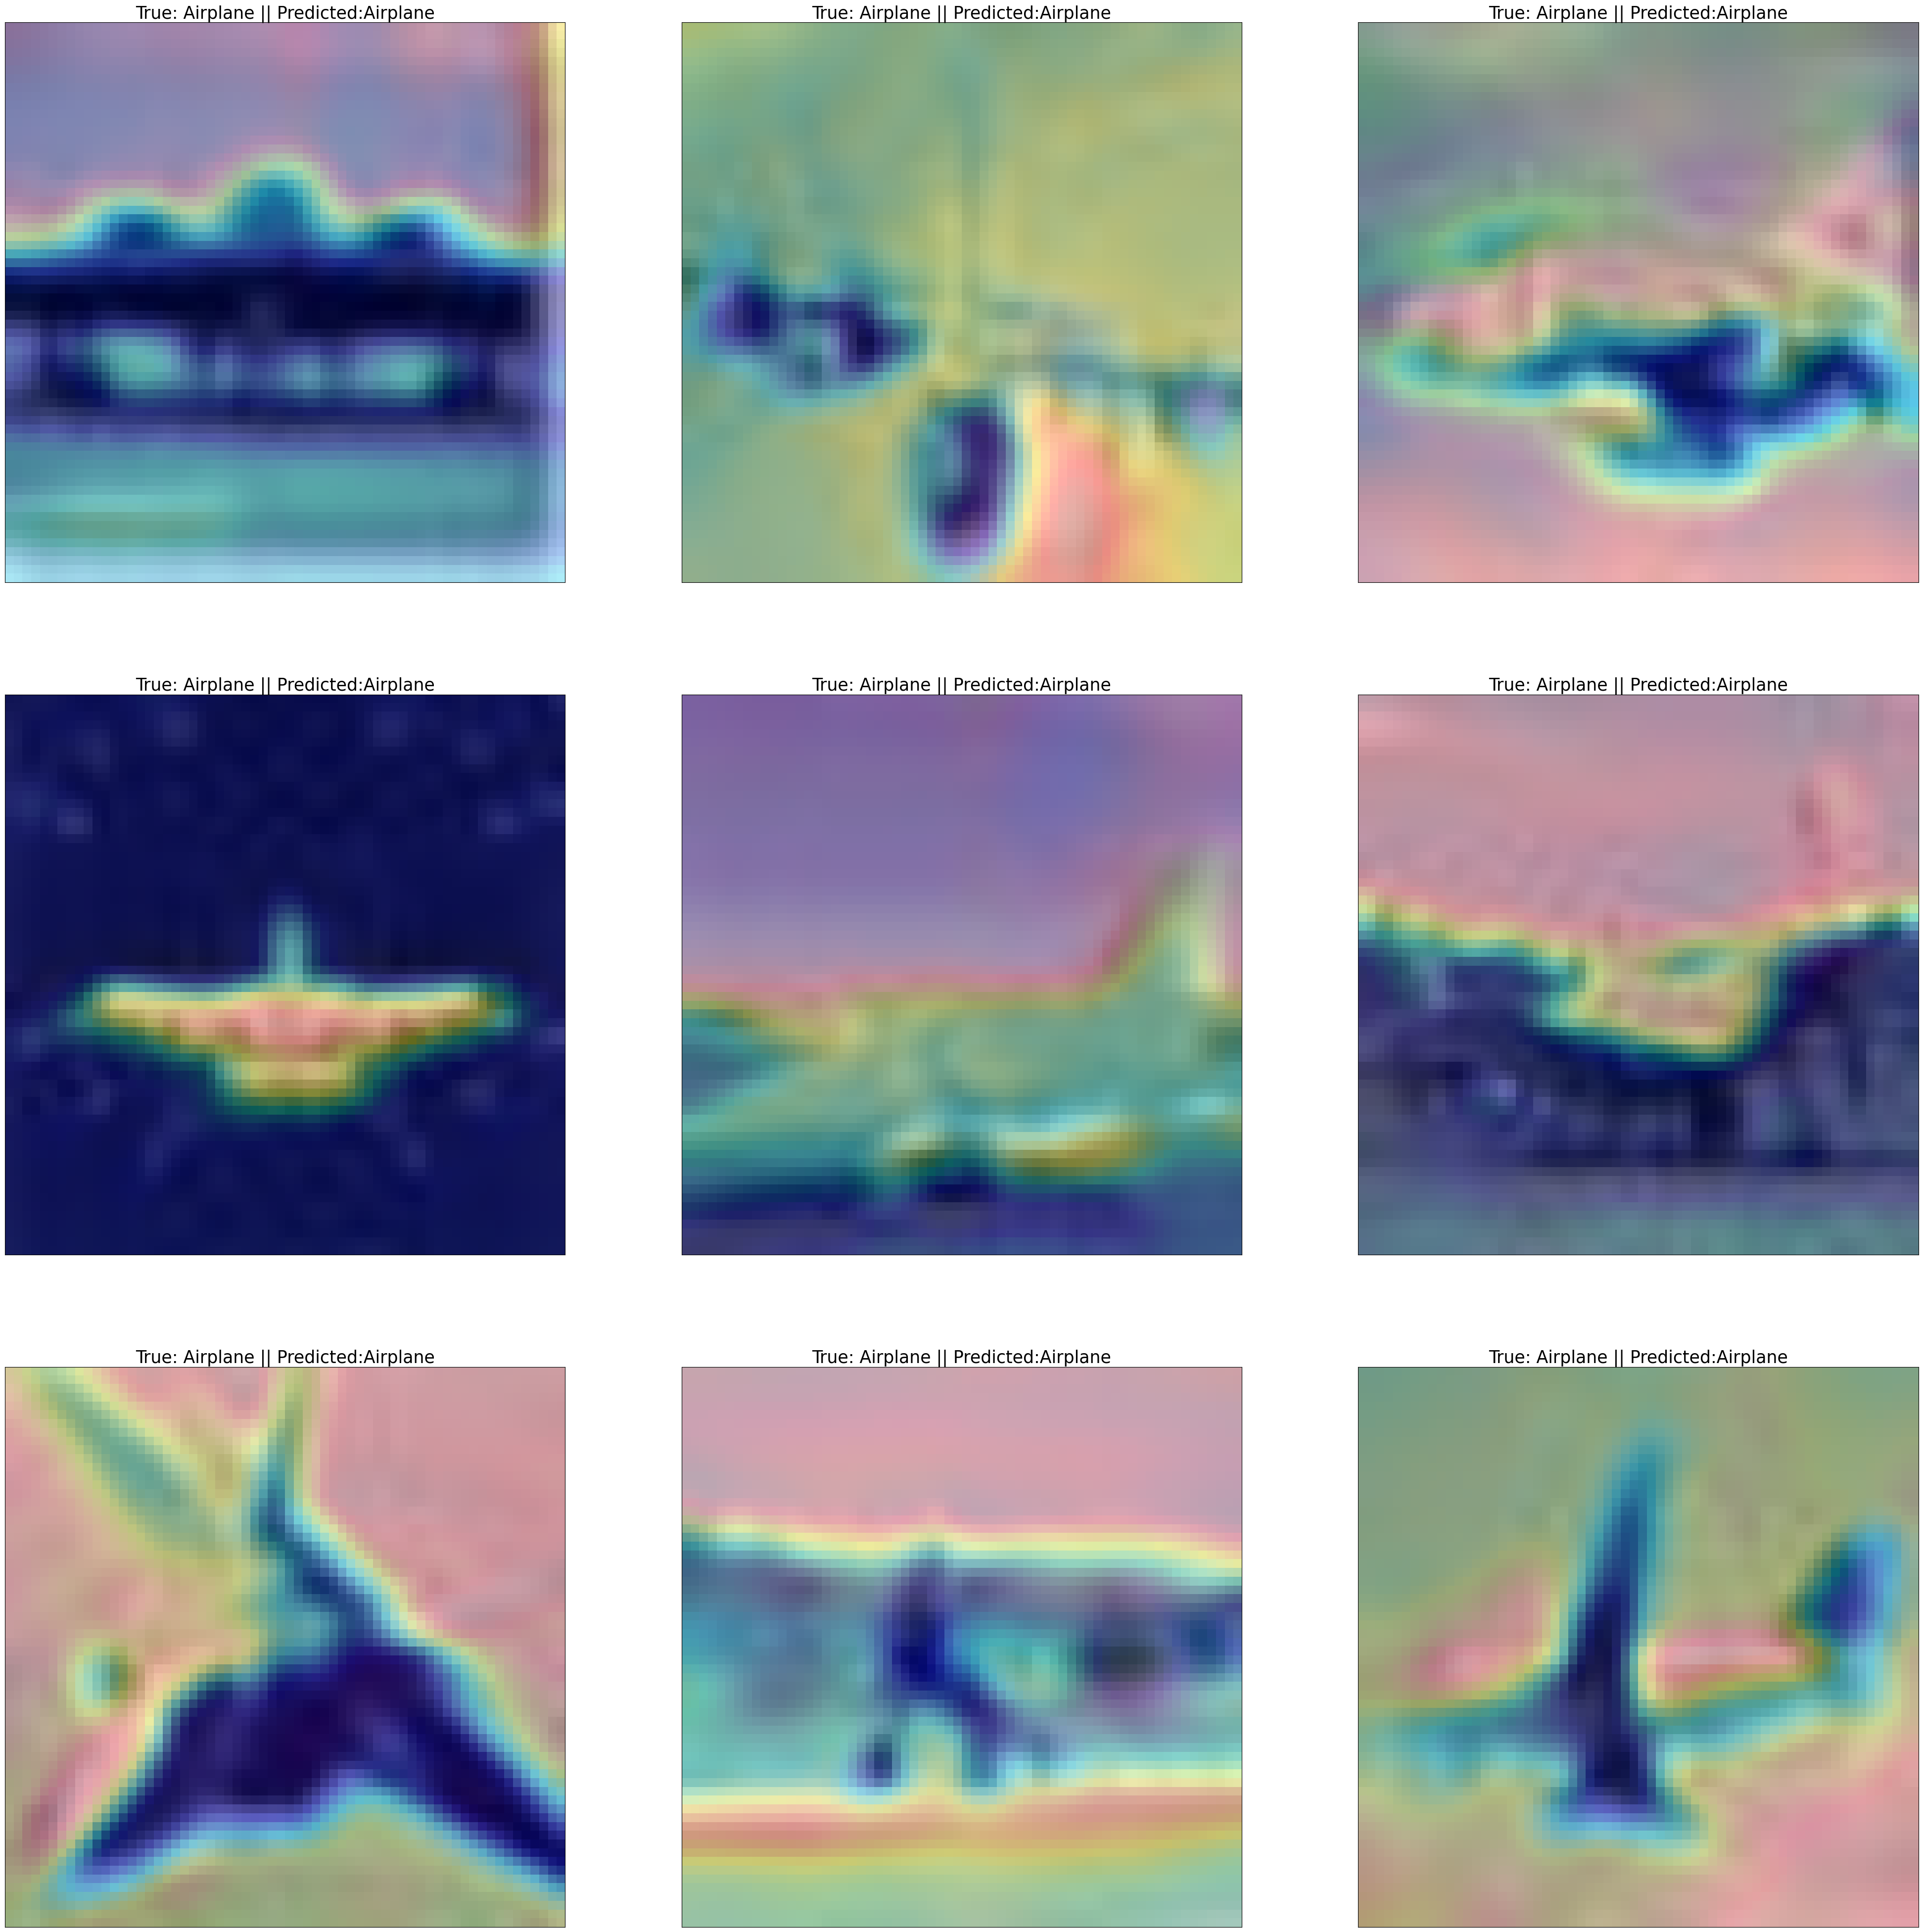

In [ ]:
# Example of code to use the gradcam functions

# Set multiple axes to plot multiple images at the same time
fig, axes = plt.subplots(3, 3, figsize=(50,50), subplot_kw={'xticks':[], 'yticks':[]})

# This can be done with any pytorch dataset, as example the "trainset" was chosed
# "preparation" is representing the composed transformations that are used for validation/test (with no augmentation)
# You should change this to your dataset class and test transformations.
train_dataset = ImageDataset('train')

for i, ax in enumerate(axes.flat):
  image, true_label = train_dataset[i*10]


  heatmap, predicted_label = get_heatmap(MyCNN, image, MyCNN.conv2, device)
  image = image.permute(1,2,0).numpy()

  display_image_with_heatmap(image, heatmap, 2, ax, labels_map[true_label], predicted_label)

Podemos ver que para a classe avião o modelo conseguiu detectar, para a maioria dos casos, a real região na qual o avião estava, segmentando sua representação do restante da imagem.

É importante perceber que ele detecta bem as regiões das asas, motores, causa e bico do avião. Já as regiões de fundo não são tão destacadas. Ainda sim, as vezes a região de destaque é a externa a área de interesse, já em outras, a região de maior destaque (vermelho) é justamente o item de interesse.

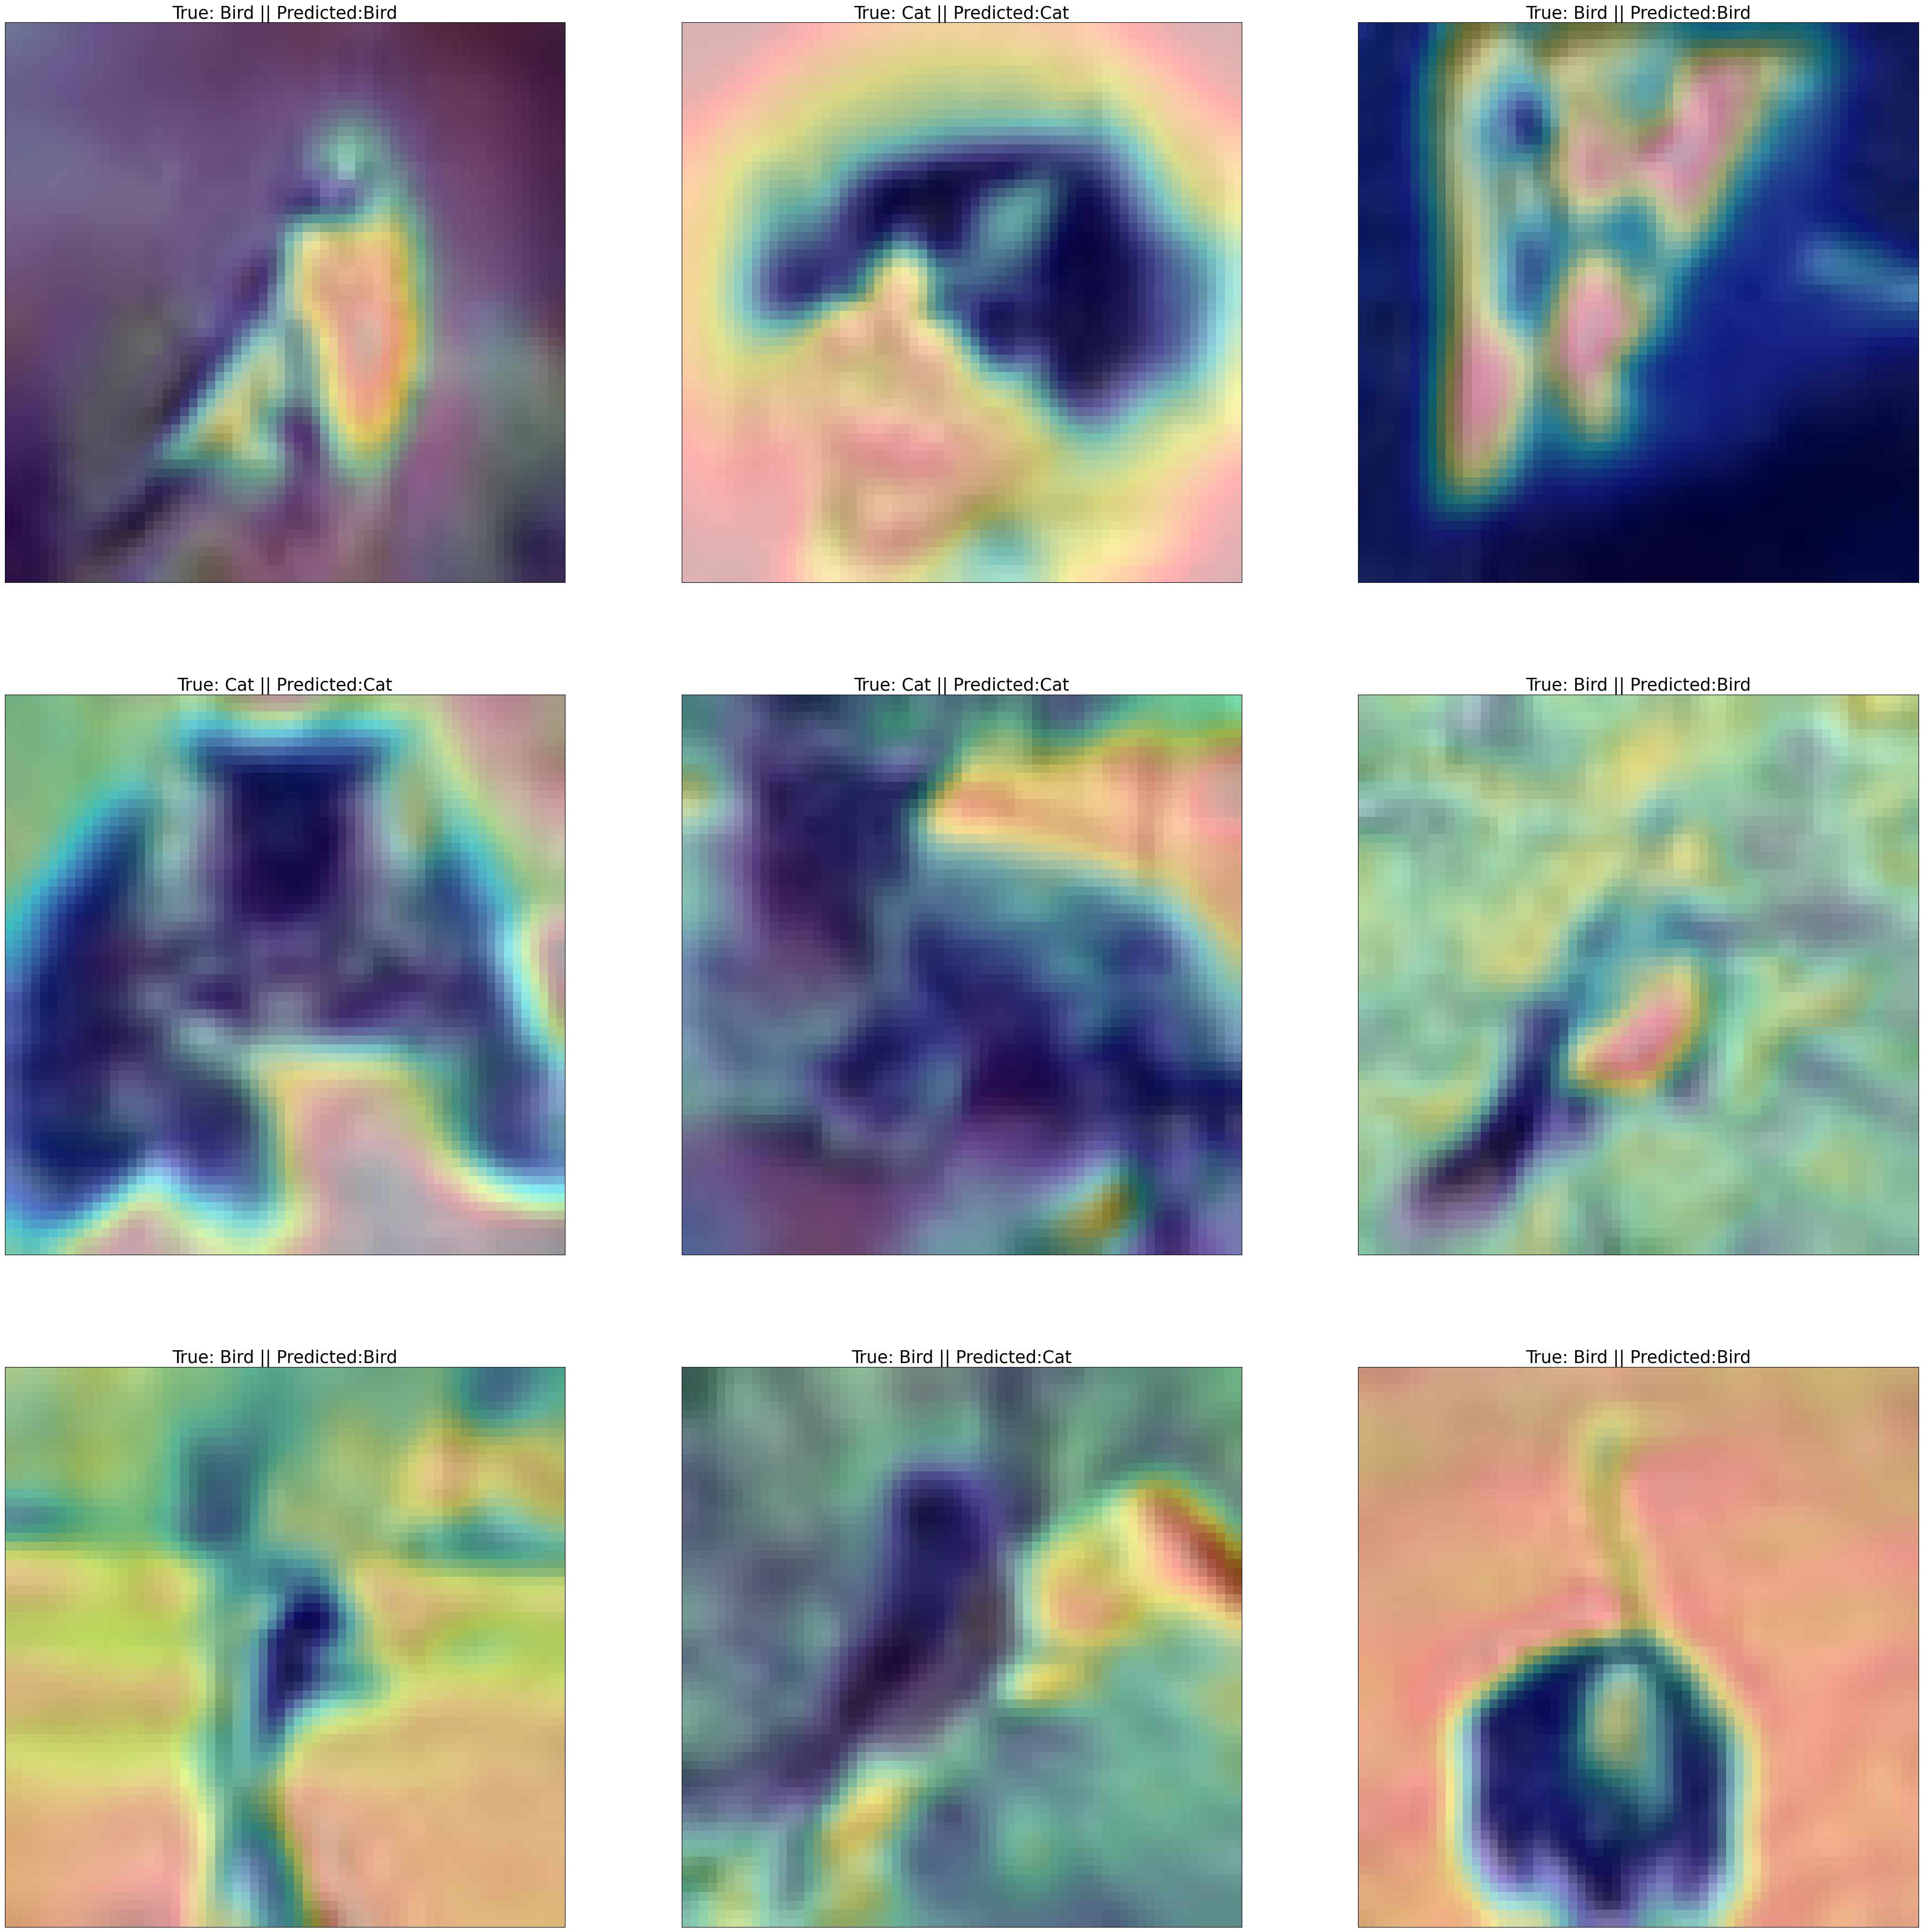

In [ ]:
# Example of code to use the gradcam functions

# Set multiple axes to plot multiple images at the same time
fig, axes = plt.subplots(3, 3, figsize=(50,50), subplot_kw={'xticks':[], 'yticks':[]})

# This can be done with any pytorch dataset, as example the "trainset" was chosed
# "preparation" is representing the composed transformations that are used for validation/test (with no augmentation)
# You should change this to your dataset class and test transformations.
train_dataset = ImageDataset('train')

for i, ax in enumerate(axes.flat):
  image, true_label = train_dataset[i + 200]


  heatmap, predicted_label = get_heatmap(MyCNN, image, MyCNN.conv2, device)
  image = image.permute(1,2,0).numpy()

  display_image_with_heatmap(image, heatmap, 2, ax, labels_map[true_label], predicted_label)

Aqui temos alguns outros casos, gato e passaros.

Novamente, o modelo parece conseguir segmentar muito bem as regiões de interesse, porém, é importante notar a quais regiões a CNN está dando maior atenção ou não.

Apesar da segmentação ser muito boa, algumas vezes o modelo da maior atenção a área externa, que não representa a imagem, mas em outras, o destaque (em vermelho) é justamente na parte de interesse.

## Deadline

Saturday, June 01, 11:59 pm.

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- June 02, 11:59 pm : grade * 0.75
- June 03, 11:59 pm : grade * 0.5
- June 04, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English) or Google Colaboratory link (remember to share it!).

**This activity is NOT individual, it must be done in pairs (two-person group).**

Only one individual should deliver the notebook.